<a href="https://colab.research.google.com/github/lucas-porto/sprint_1_mvp/blob/master/Projeto_MVP_Sprint_I_Lucas_Porto_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Sprint I


## Análise e Pré-processamento de dados

### **Descrição do projeto**


*   Qual é a descrição do problema?

Os dados são relacionados com campanhas de marketing de contato ativo, ligações, de um banco Português. O objetivo é predizer se o cliente irá assinar um investimento.

*   Este é um problema de aprendizado supervisionado ou não supervisionado?

Este problema é um aprendizado supervisionado, já que em nosso dataset temos a variável target que é a coluna y a qual nos explica o que aconteceu nos dados, nos dando insumo para previsão de dados novos.

*   Que premissas ou hipóteses você tem sobre o problema?

Podem haver variáveis altamente correlacionadas e que pessoas com crédito em atraso tem uma propensão maior a contratar, assim como pessoas com menos escolaridade.

*   Que restrições ou condições foram impostas para selecionar os dados?

Algumas colunas que eram altamente correlacionadas, dados duplicados e variáveis categóricas.

*   Defina cada um dos atributos do dataset.

**Dados do cliente:**

1. Age: idade do cliente
2. Job: Profissão
3. Marital: estado civil
4. Education: nível de escolaridade
5. Default: Possui crédito em atraso?
6. Housing: Possui empréstimo para habitação?
7. Loan: Possui algum empréstimo pessoal?

**Dados relacionados ao último contato da campanha atual:**

8. Contact: tipo do canal de comunicação (celular ou telefone)
9. Month: Último mês de contato
10. Day_of_week: Dia da semana do último contato
11. Duration: Duração do último contato, em segundos. Ponto importante: esse atributo tem alta correlação com a target se duration=0 então a target é 'no'. Esse dado só é conhecido após a ligação, logo para predições deve ser descartado.


**Outros atributos:**

12. Campaing: quantidade de contatos durante a campanha.
13. Pdays: quantidade de dias desde o último contato (caso não tenha sido contactado 999)
14. Previous:  quantiade de contatos antes da atual campanha.
15. Poutcome: resultado da campanha anterior.

**Outros atributos:**

16. Emp.var.rate: taxa de variação de emprego.
17. Cons.price.idx: índice de preços do consumidor
18. Cons.conf.idx: índice de confiança do consumidor
19. Euribor3m: taxa Euribor 3 meses.
20. Nr.employed: número de empregados

**Target:**

21. y. Se o cliente contratou ou não

Fonte: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

### **Resumo do projeto**

### **Imports**

#### Bibliotecas

In [87]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

### **Dataset**

In [88]:
path = 'https://raw.githubusercontent.com/lucas-porto/sprint_1_mvp/master/datasets/bank-additional-full.csv'

data_origin = pd.read_csv(path, delimiter=';')
data = data_origin.copy()

In [89]:
data.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### **Análise e tratamento**

In [90]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### Dados duplicados

In [91]:
print(f'Temos um total de {data.duplicated().sum()} dados duplicados do total de {data.shape[0]}.')

Temos um total de 12 dados duplicados do total de 41188.


Conforme verificado, temos um total de 12 de dados duplicados, iremos retirar esses dados para termos uma base mais consistente.

In [92]:
# irei deletar os dados duplicados
data.drop_duplicates(inplace=True)

In [93]:
print('Verificando quais colunas temos dados constantes?',data.columns[data.nunique() <= 1])

Verificando quais colunas temos dados constantes? Index([], dtype='object')


In [94]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [95]:
data.y.value_counts(normalize=True) * 100

no     88.733728
yes    11.266272
Name: y, dtype: float64

Neste ponto vemos que a base é desbalanceada, onde temos aproximadamente 11% da target é dos individuos contrataram um empréstimo, iremos avaliar se o desbalanceamento irá atrapalhar nossos treinamentos.

Existem alguns processos para balanceamento de dados:
 - Técnicas de reamostragem: Undersampling ou Oversampling
 - SMOTE
 - Mudar a métrica
 - Estratificar os dados

Olhando as distribuições das variáveis numéricas.

#### Dados numéricos

In [96]:
coluna_numerica = data.dtypes[data.dtypes == 'int64'].index | data.dtypes[data.dtypes == 'float64'].index

In [97]:
pallete_style ='darkgrid'
pallete_color='mako'
sns.set_style(pallete_style)
sns.set_palette(pallete_color)

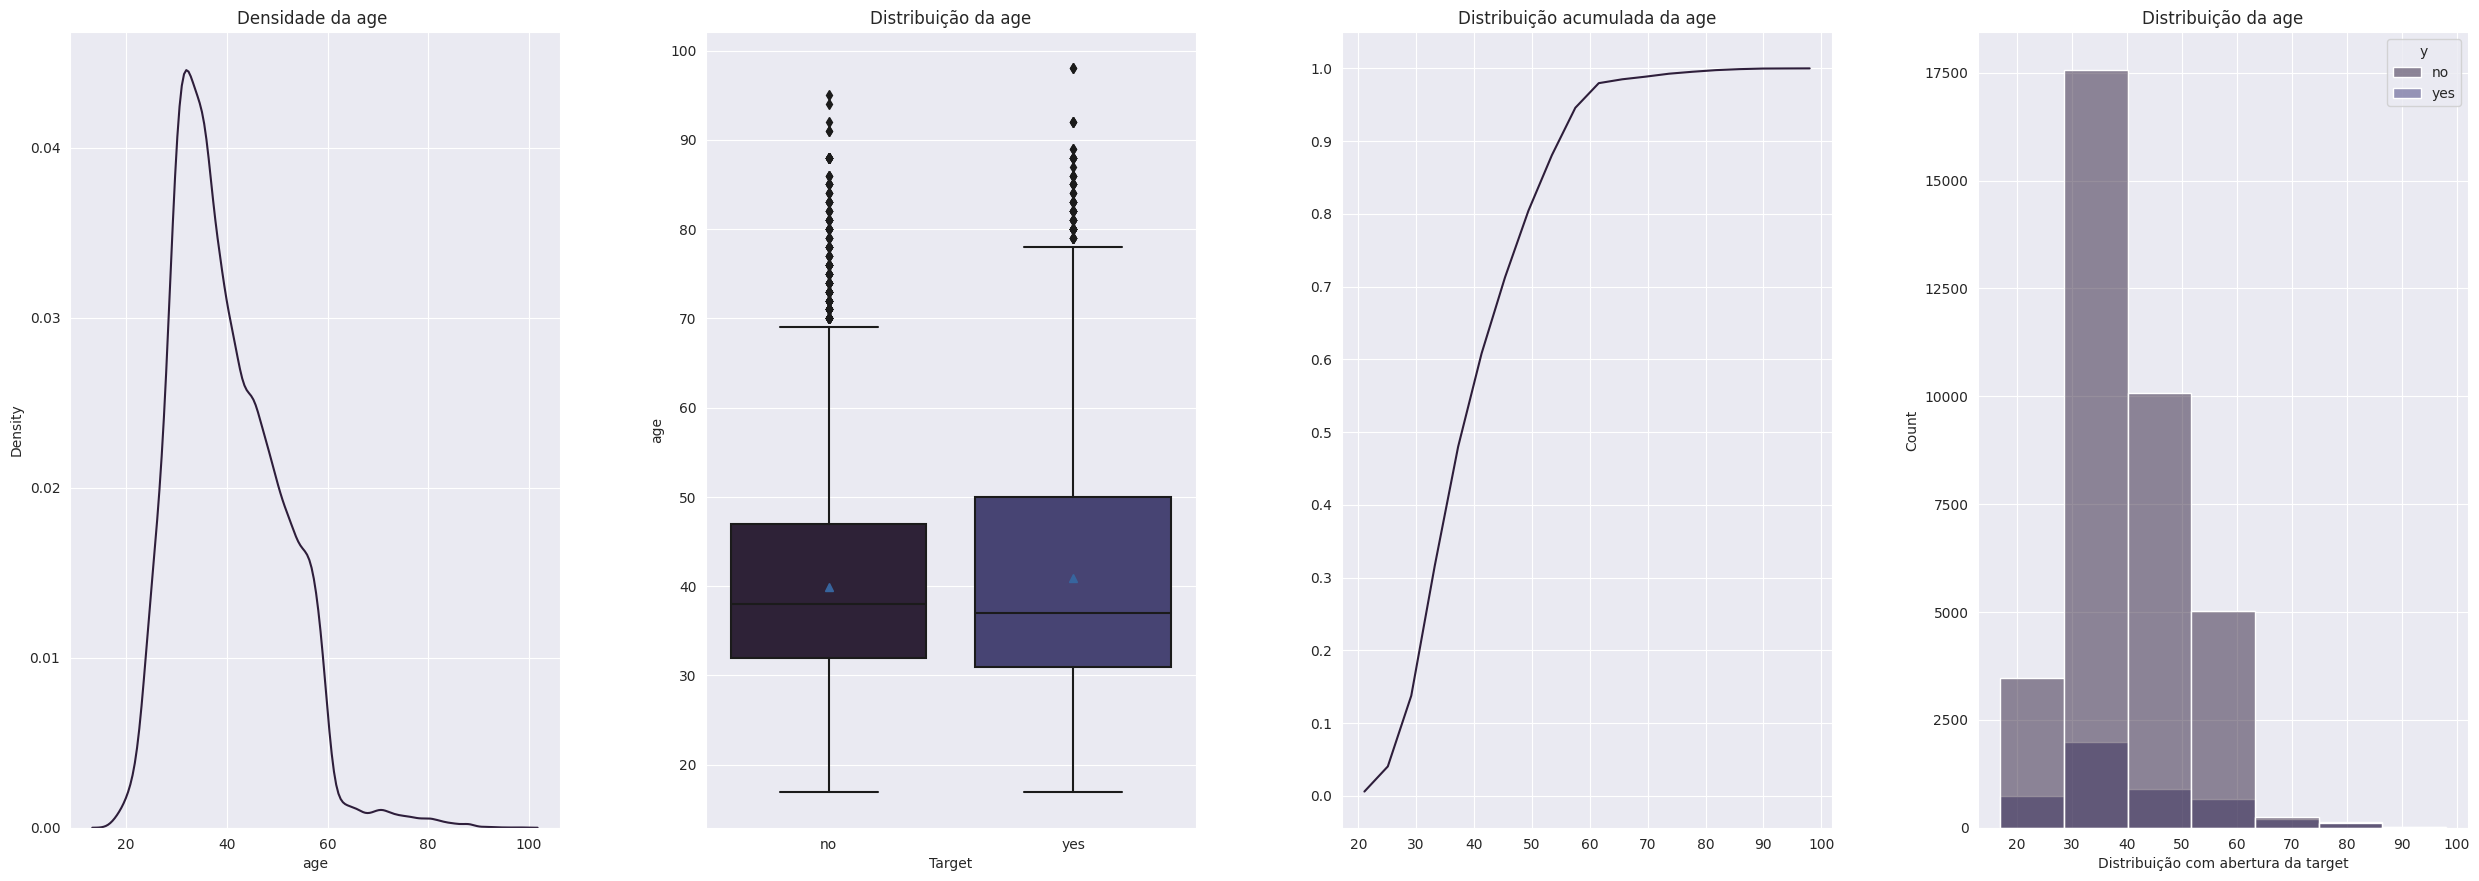

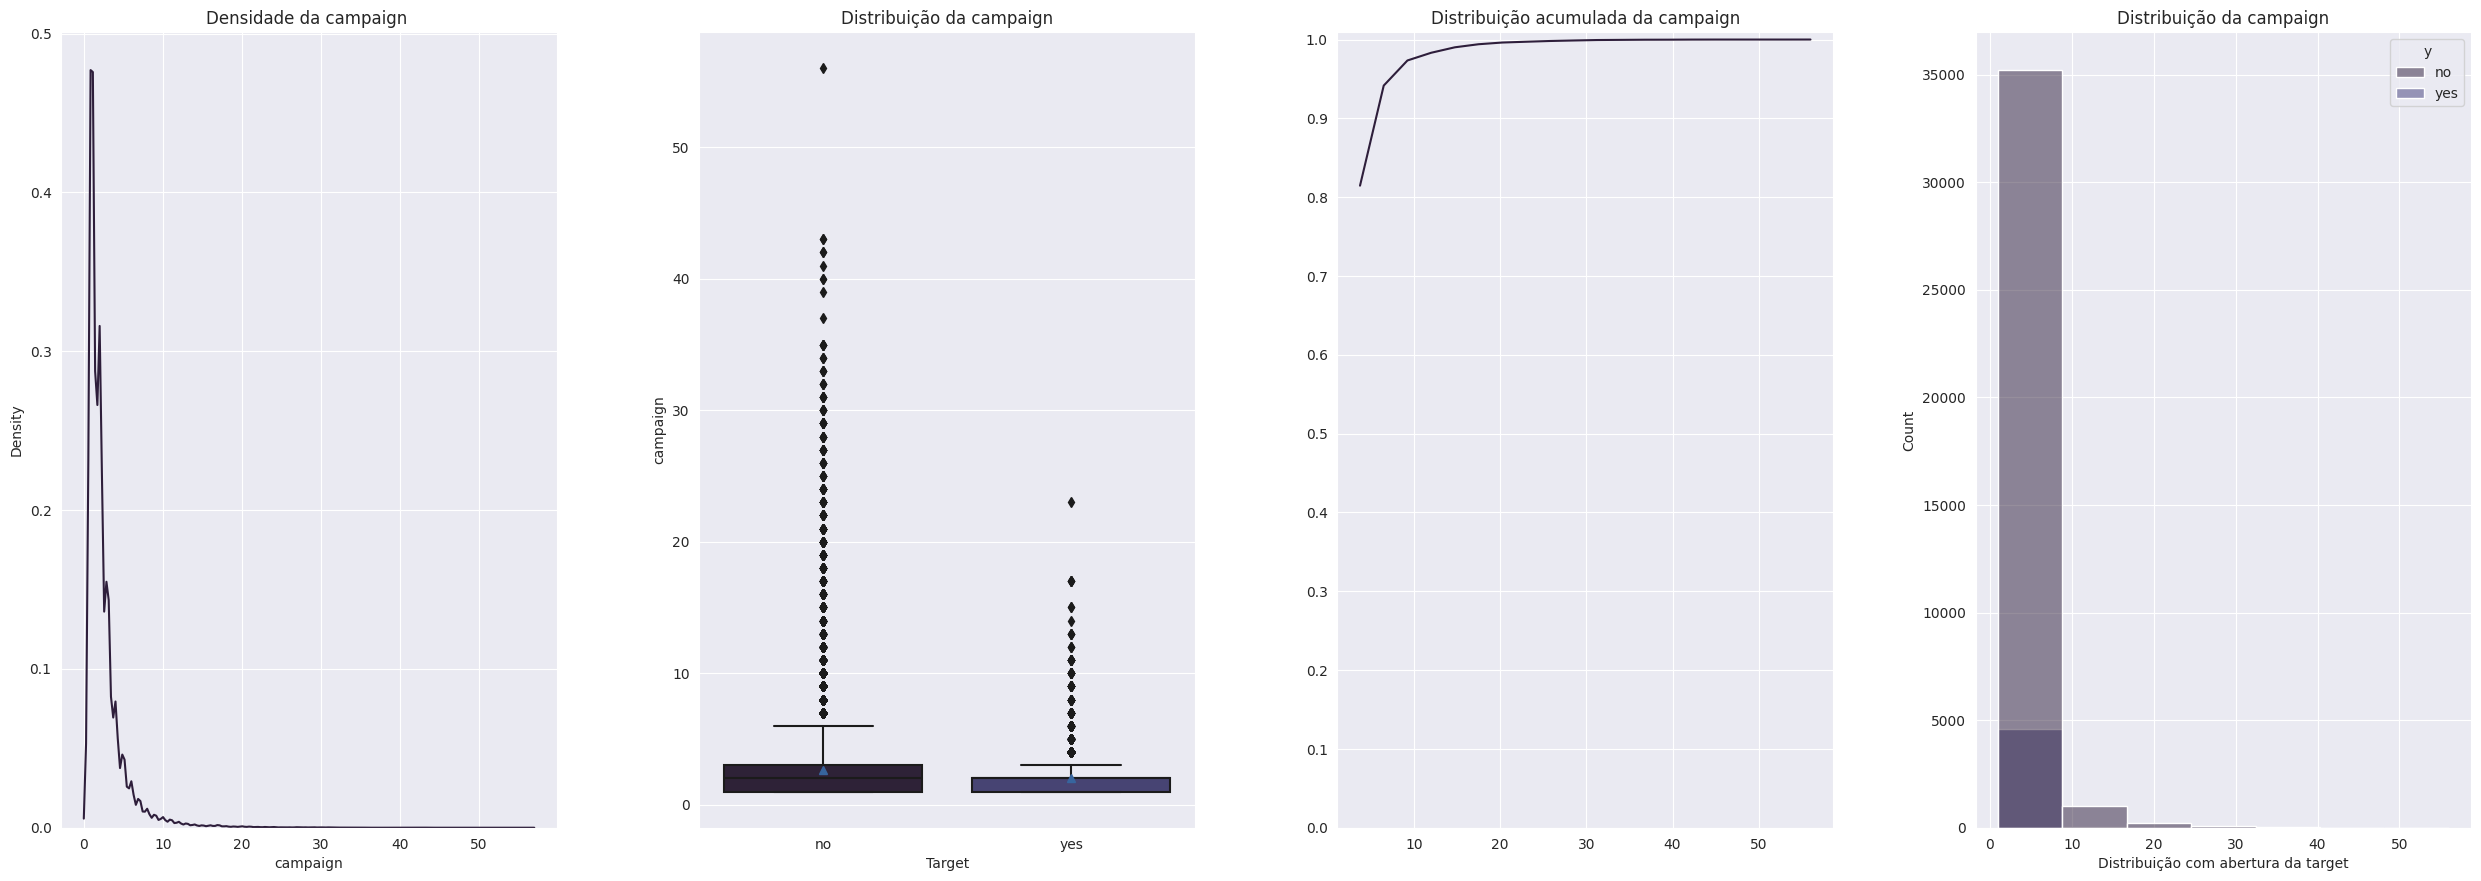

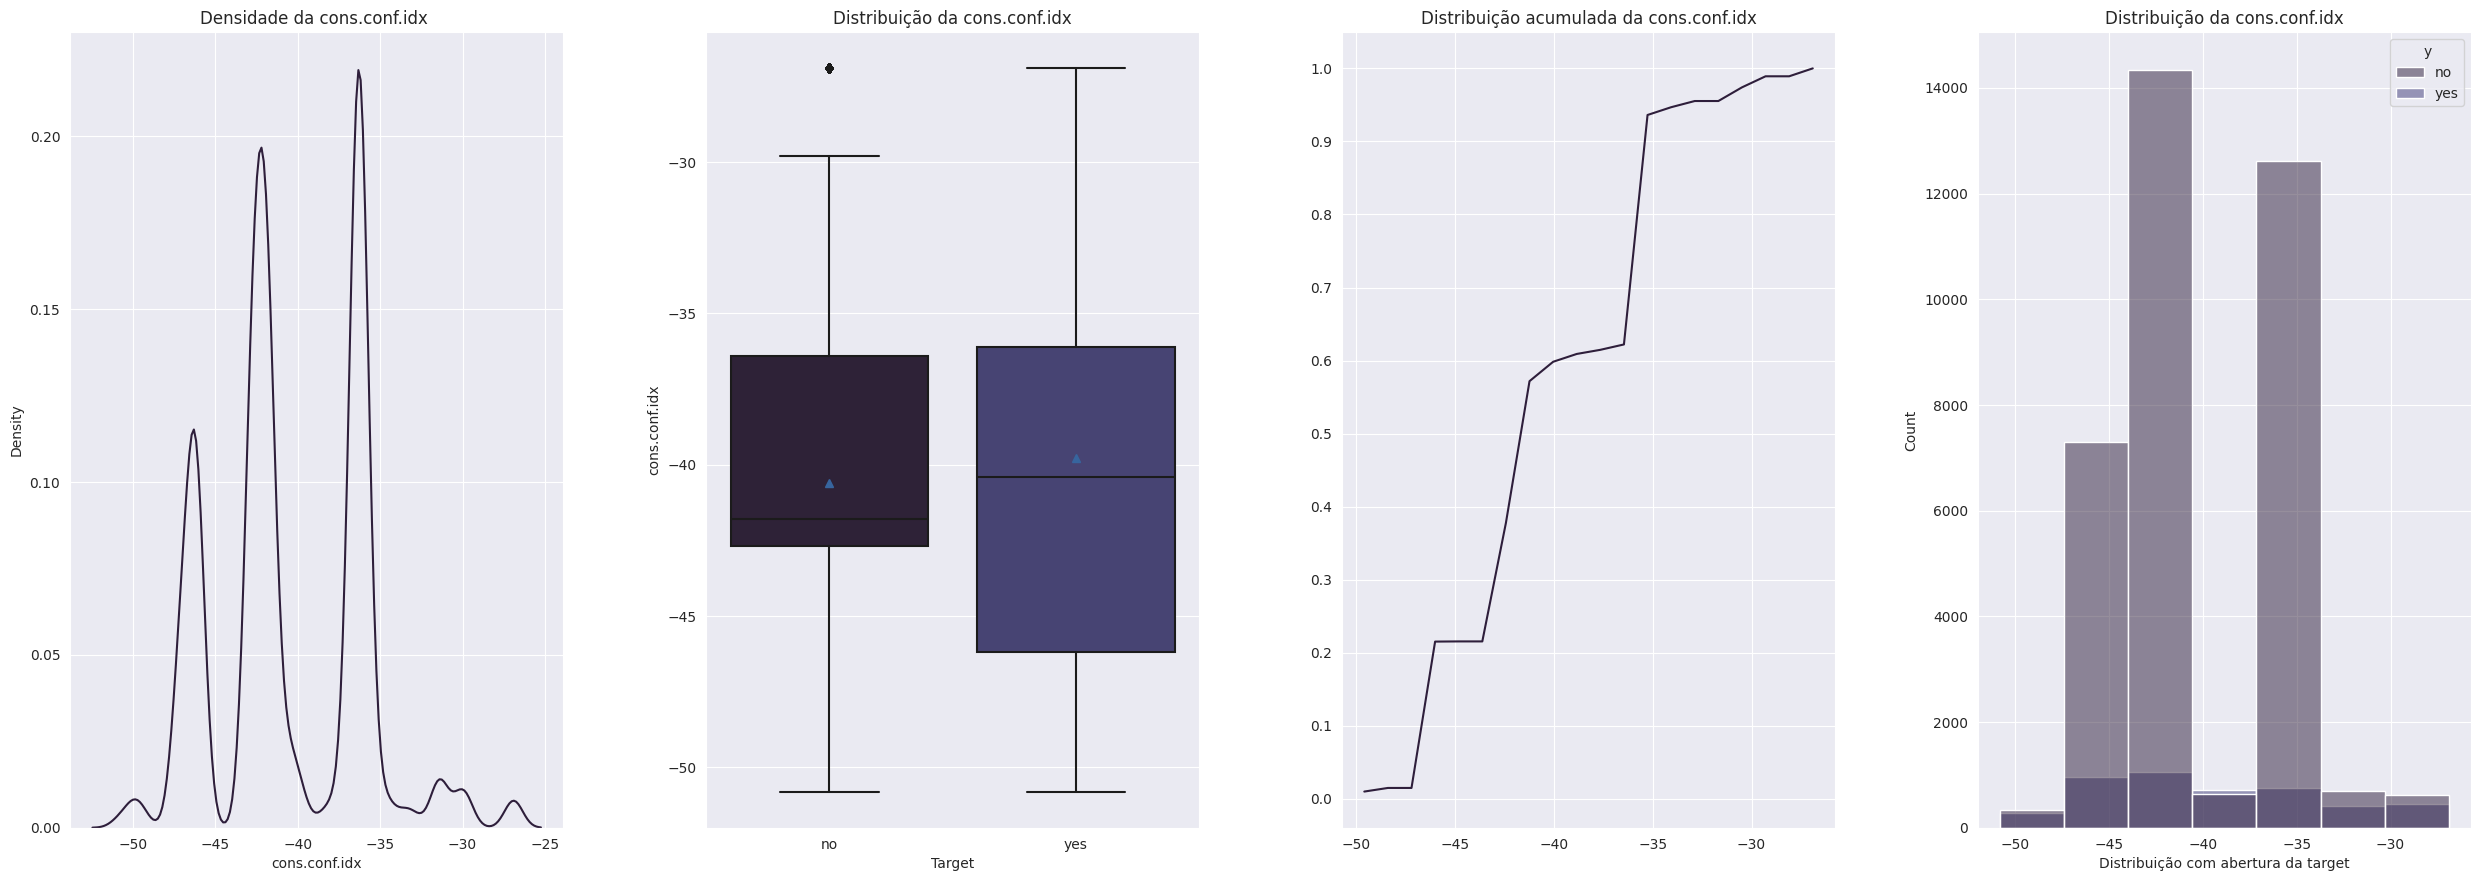

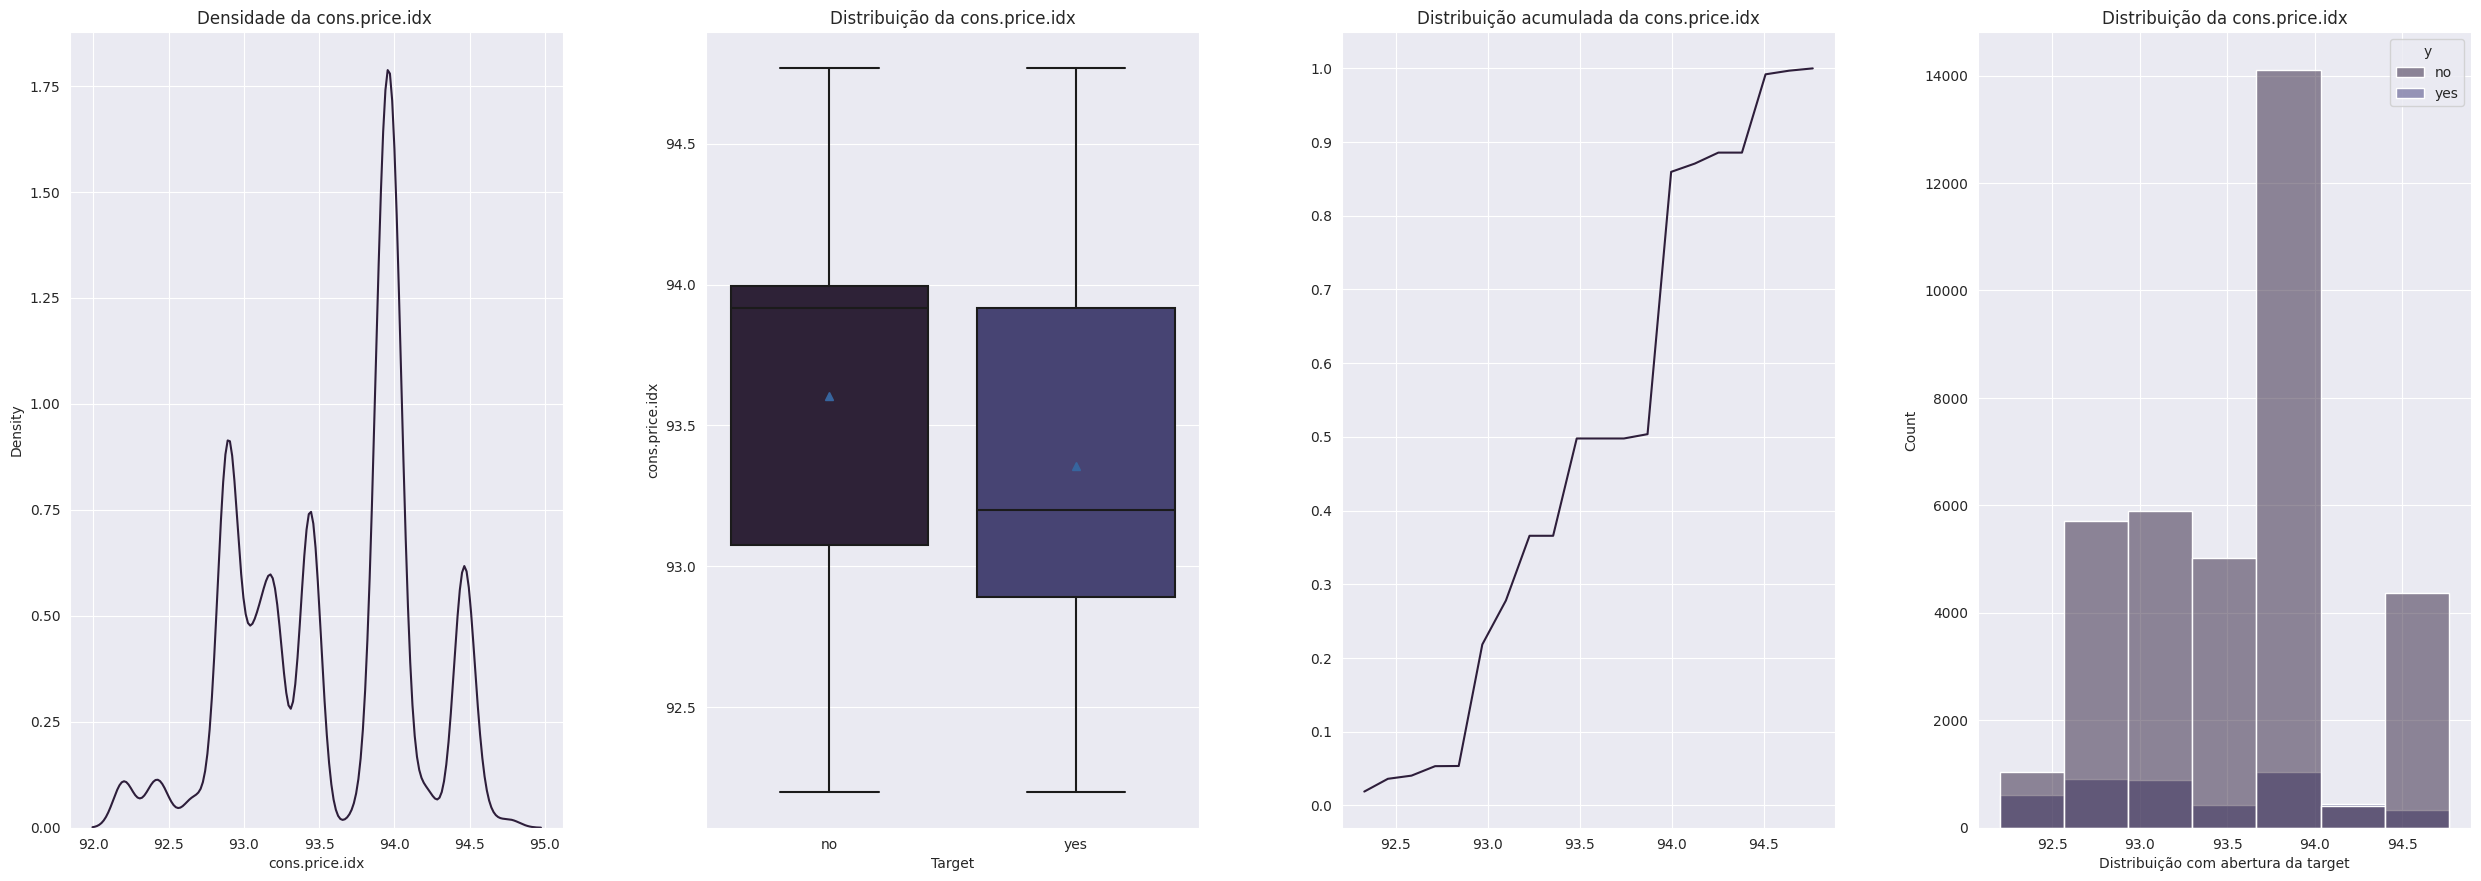

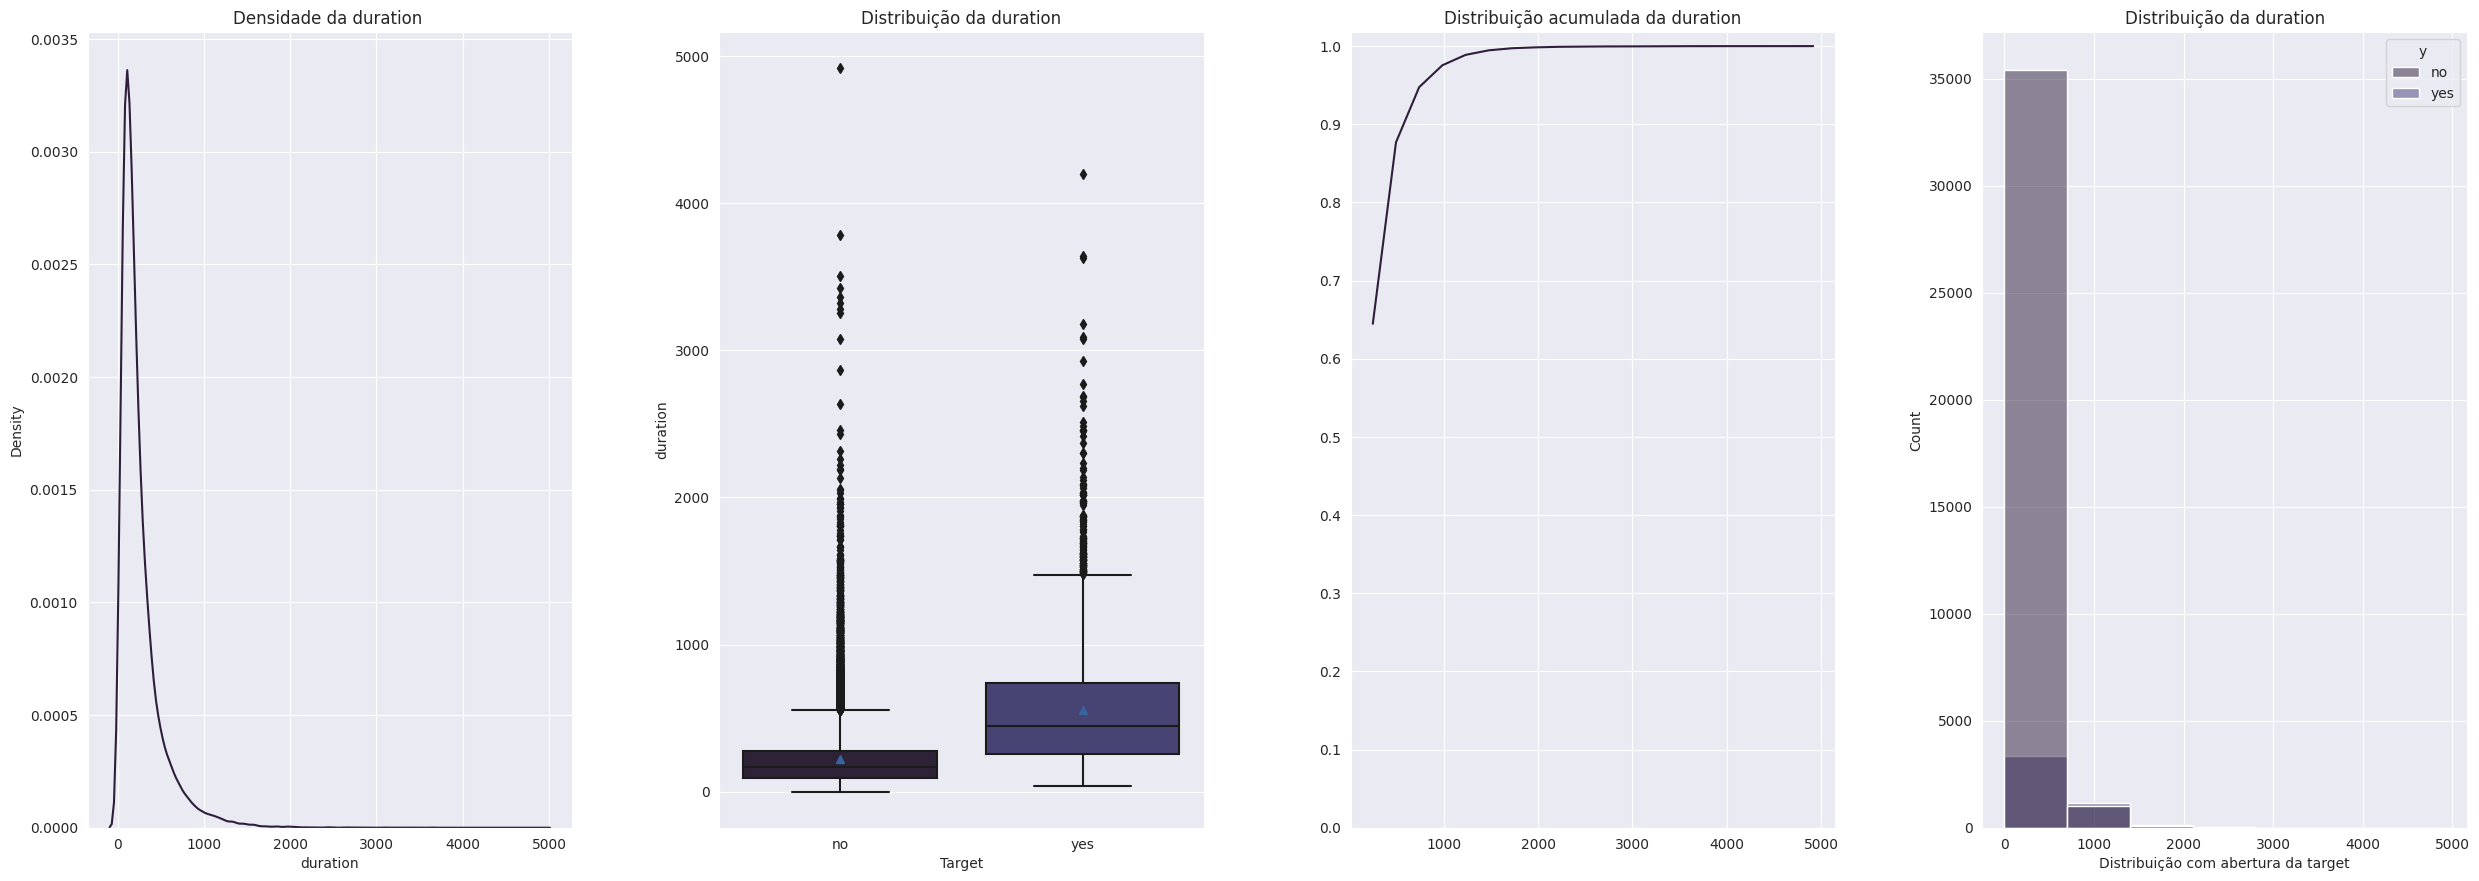

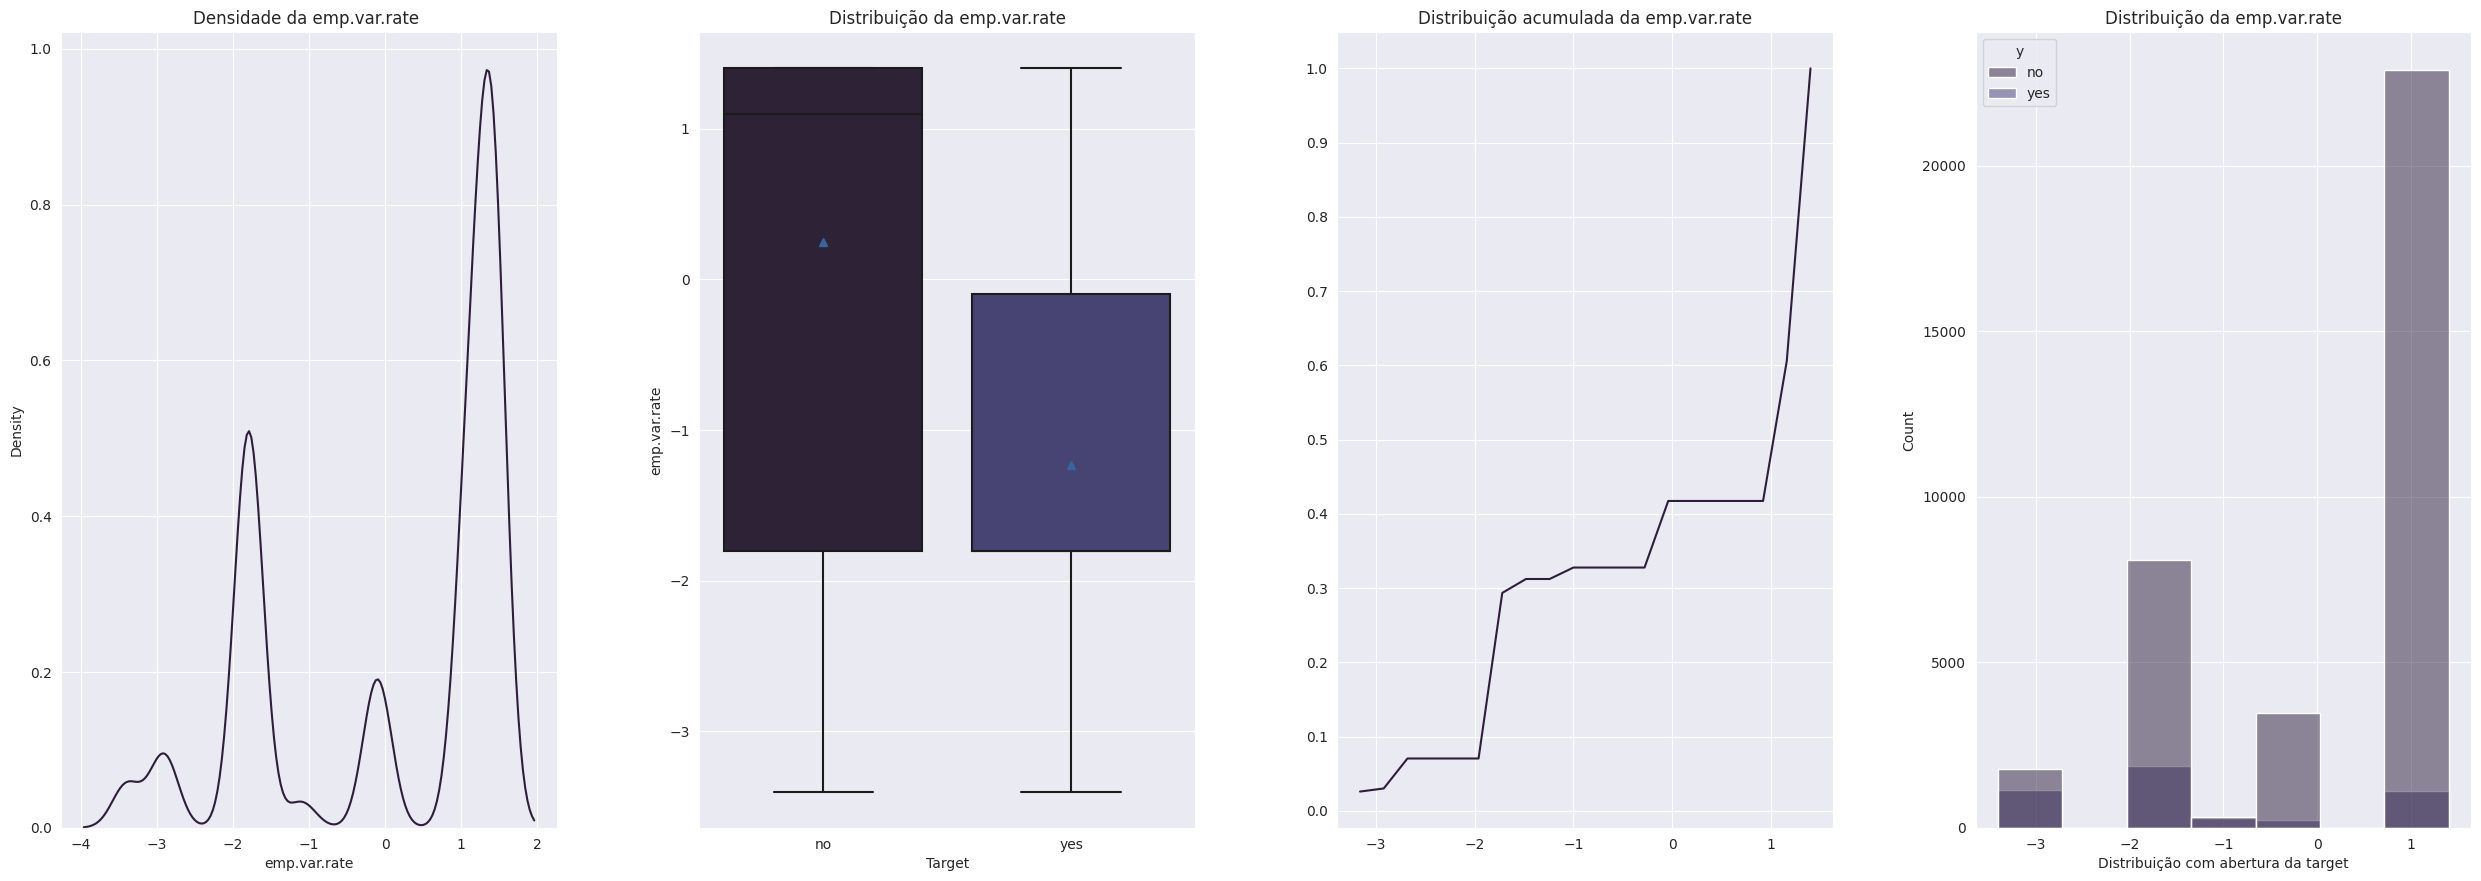

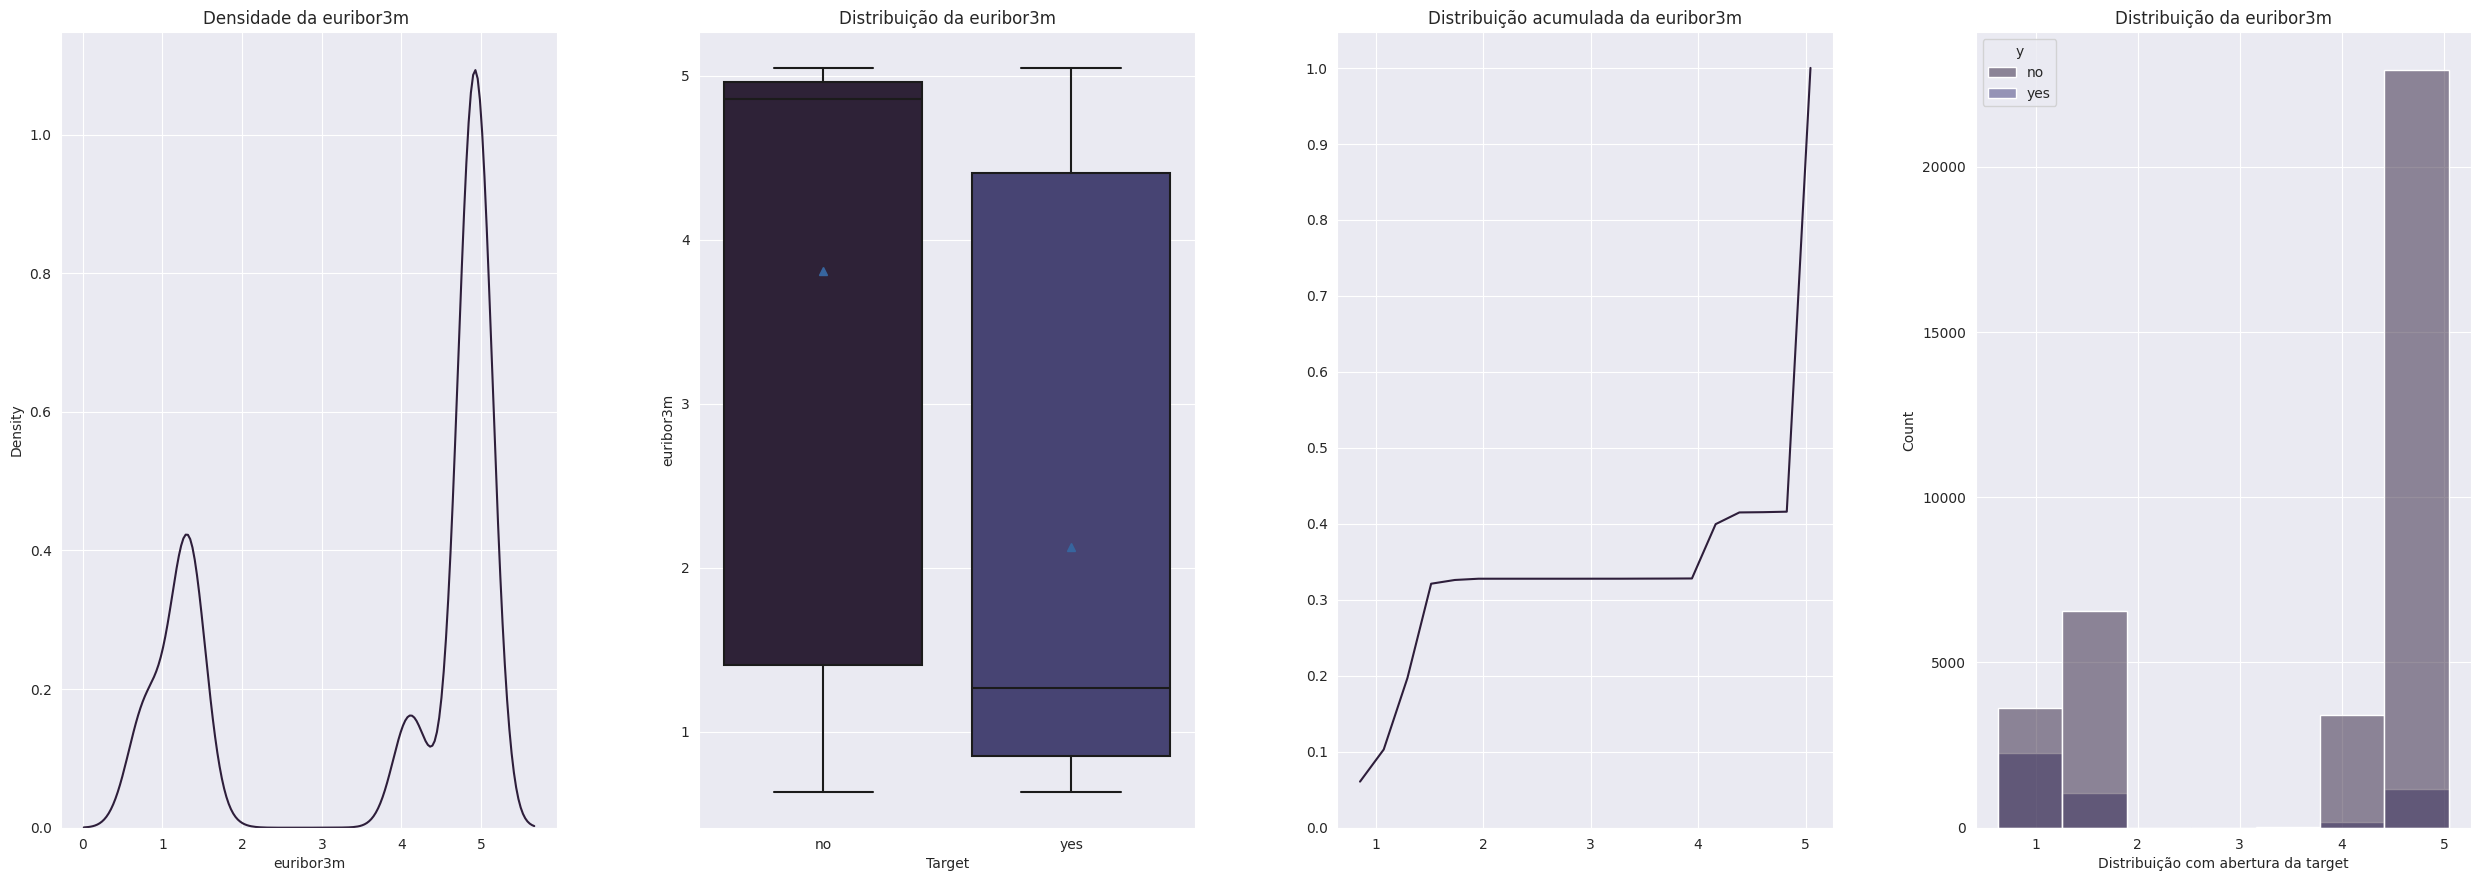

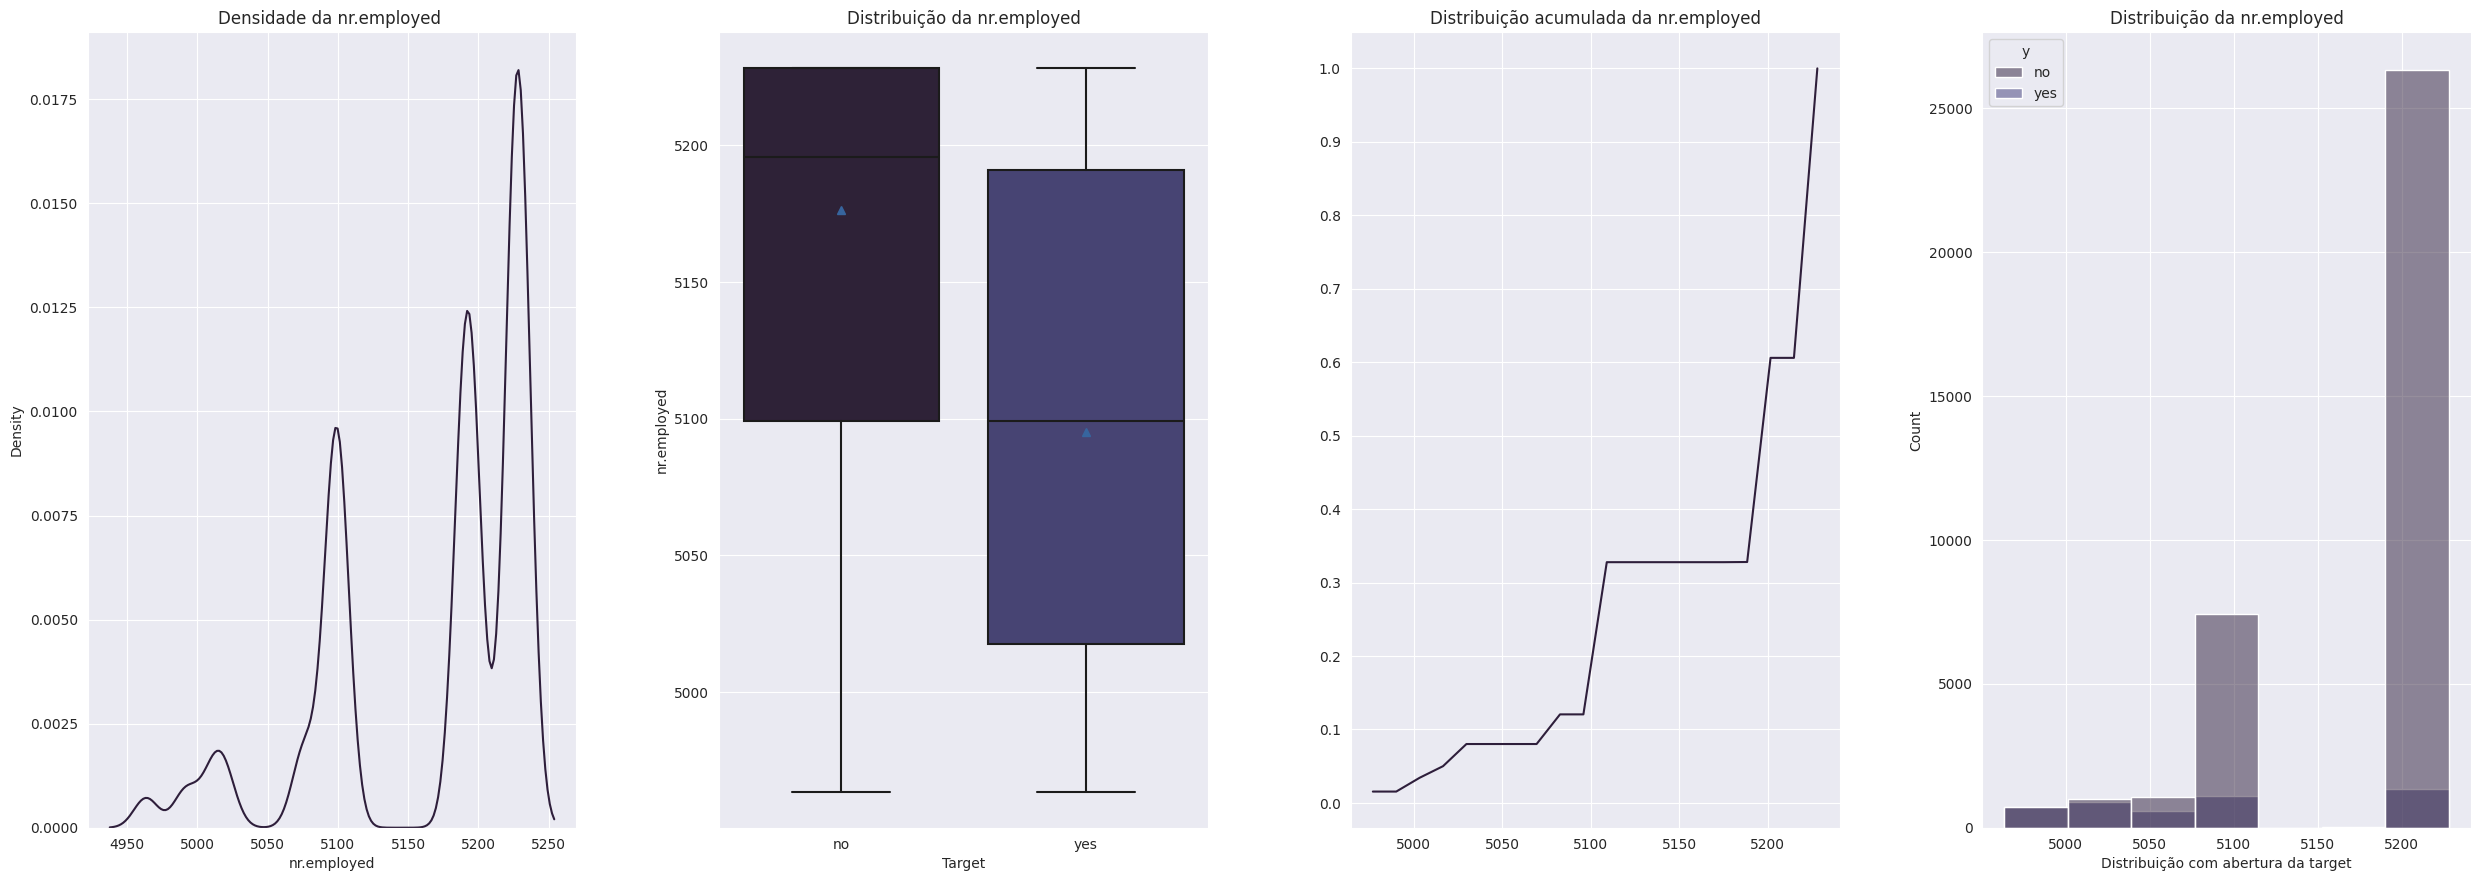

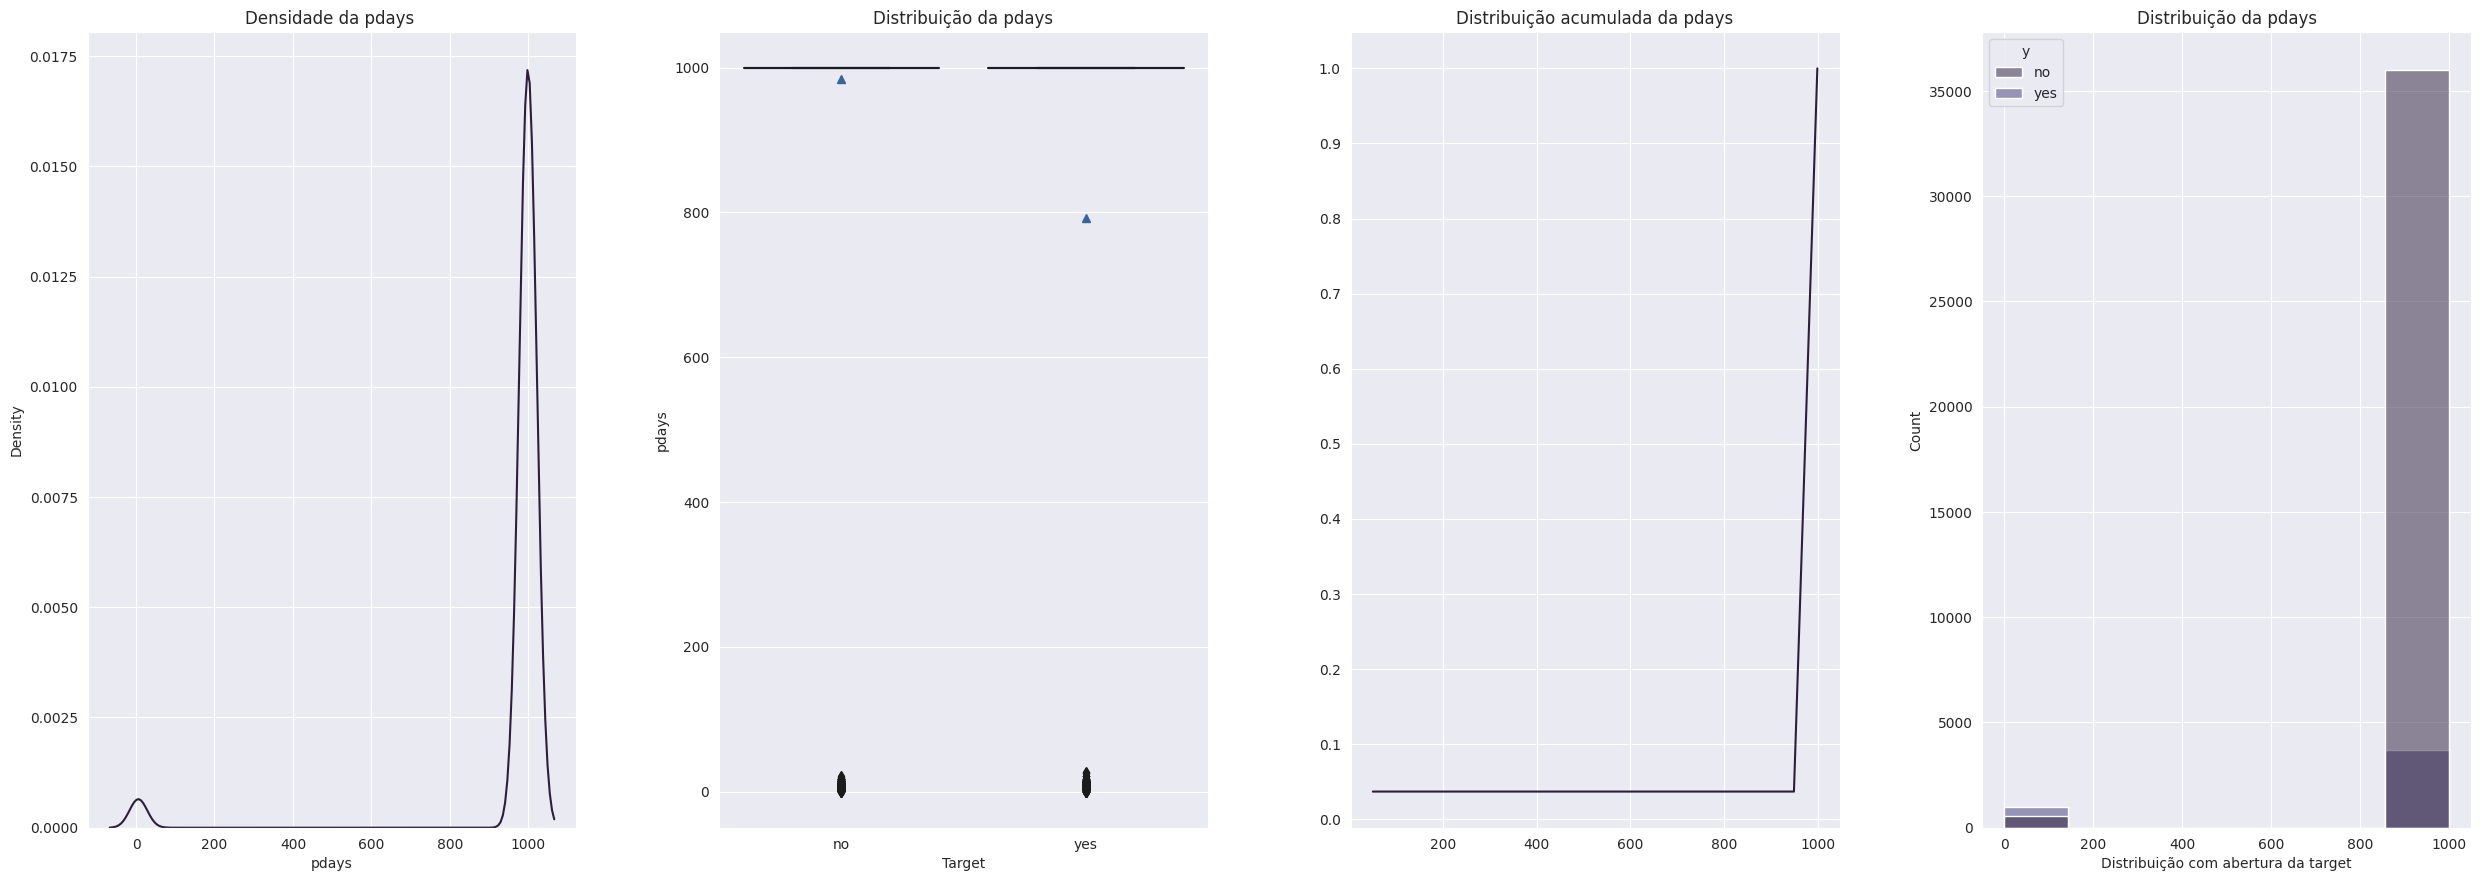

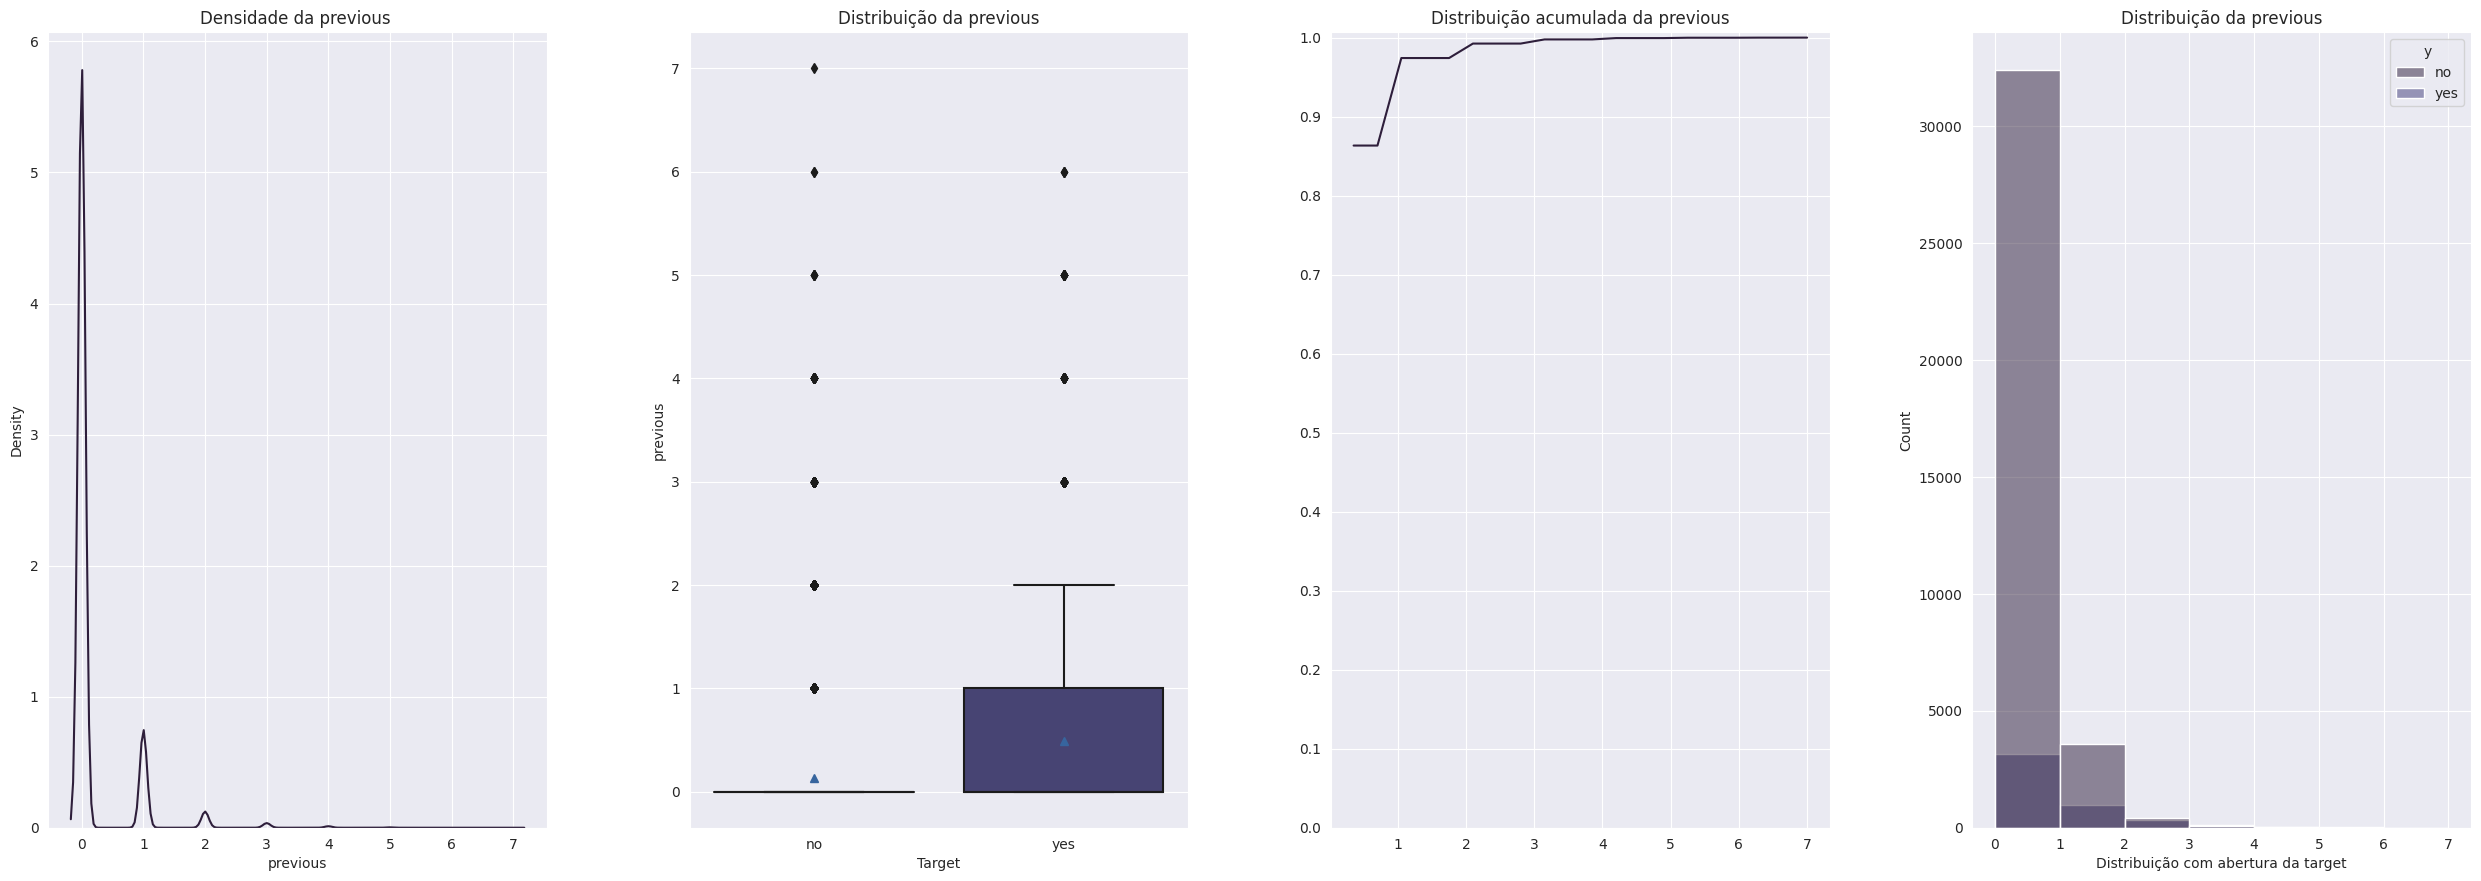

In [98]:
for column in coluna_numerica:
    plt.figure(figsize=(26,10))

    plt.subplot(1,4,1)
    sns.kdeplot(x=column, data=data)
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'Densidade da {column} ')

    plt.subplot(1,4,2)
    sns.boxplot(x='y', y=column, data =data, showmeans=True )
    plt.xlabel('Target')
    #plt.ylabel(column)
    plt.title(f'Distribuição da {column}')

    plt.subplot(1,4,3)
    counts, bins = np.histogram(data[column], bins=20, normed=True)
    cdf = np.cumsum (counts)
    plt.plot (bins[1:], cdf/cdf[-1])
    #plt.xticks(range(15,100,5))
    plt.yticks(np.arange(0,1.1,.1))
    plt.title(f'Distribuição acumulada da {column}')

    plt.subplot(1,4,4)
    sns.histplot(data=data, x=column, color='b', bins=7, hue='y')
    plt.xlabel('Distribuição com abertura da target')
    #plt.ylabel(column)
    plt.title(f'Distribuição da {column}')

    plt.tight_layout(pad=5.0)
    plt.show()
    print()



Um breve resumo do que encontramos para as variáveis numéricas:

- Age:
  - Distribuição assimétrica à direita
  - Média em 40 anos
  - Desvio padrão em 10 anos
  - Não há muita diferença na distribuição de idade para quem contratou ou não

- Duration:
  - Distribuição assimétrica à direita
  - Média em 258 segunds
  - Desvio padrão em 259 segundos
  - Quem contratou tem uma média um pouco maior de quem não contratou, podemos inferir que quem dá mais atenção acaba contratando.

- Campaing:
  - Distribuição assimétrica à direita
  - Média em 2,56 contatos
  - Desvio padrão em 2,77 contatos
  - Quem não contratou tem uma média maior que de quem contratou.

- Previous:
  - Distribuição assimétrica à direita
  - Média em 0,08
  - Desvio padrão em 1,58
  - Quem contratou tem uma distribuição maior de contatos anteriores.
  
- Emp.var.rate:
  - Distribuição assimétrica
  - Média em 0,17
  - Desvio padrão em 0,49
  - Essa taxa a média para os que contrataram era menor do que para os que contrataram.

- cons.price.idx:
  - Distribuição assimétrica
  - Média em 93
  - Desvio padrão em 0,5
  - Esse índice a média e mediana para os que contrataram era menor do que para os que contrataram.

- cons.conf.idx:
  - Distribuição assimétrica
  - Média em -40
  - Desvio padrão em 4,6
  - Esse índice a média e mediana para os que contrataram era maior do que para os que contrataram.

Nesse ponto podemos ver que alguns dados podem ser eliminados futuramente para limparmos o dataset:

- coluna pdays

#### Dados categóricos

Para as variáveis categóricas, teremos que fazer alguns plots com dados agregados.

In [99]:
coluna_categorica = [column_name for column_name in data.iloc[:, :20] if data[column_name].dtype == 'O']

In [100]:
dados_agrupados = data.groupby('y')

In [101]:
# Função para plotar os gráficos em barra
def plot_barh(dados, step, maximo, text_color='blue'):
    sns.set_style(pallete_style)
    sns.set_palette(pallete_color)

    plt.barh(dados.index, width = dados.values, height = .5)
    plt.yticks(np.arange(len(dados)))
    plt.xticks( range(0, round(max(dados)) +maximo, step ))

    for index, value in enumerate(dados.values):
        plt.text(value +.5, index, s= '{:.1f}%'.format(value), color = text_color)

    return plt

# Função para agregar os dados
def feature_perc( feature, target = 'yes'):

    count = dados_agrupados.get_group(target)[feature].value_counts()
    total_count = data[feature].value_counts()[count.index]

    perc = (count/total_count)*100
    return perc


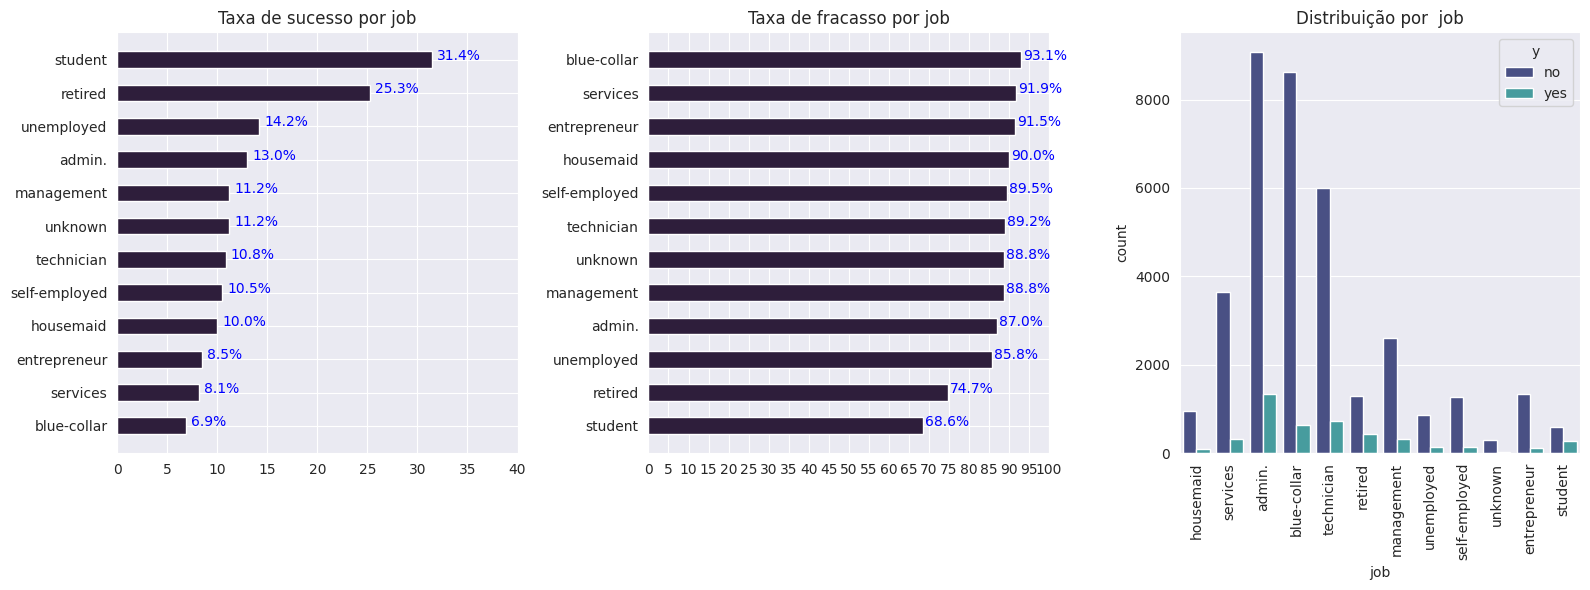

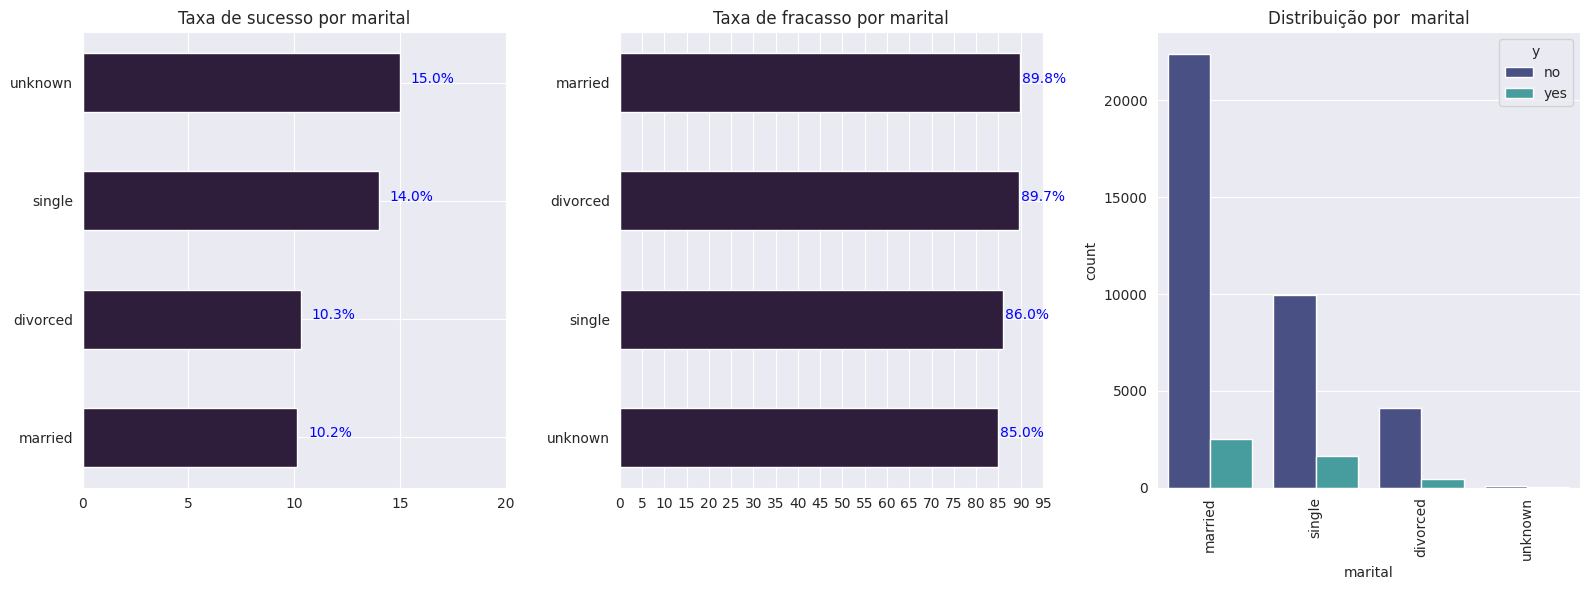

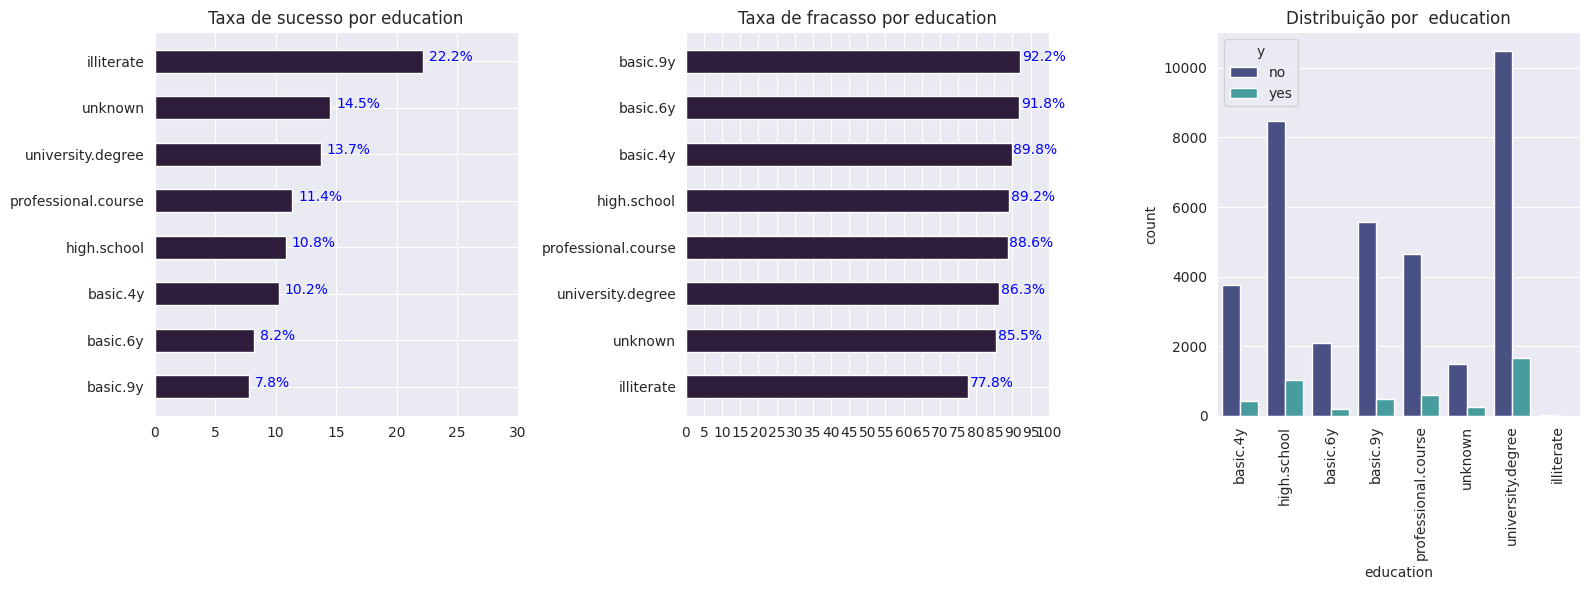

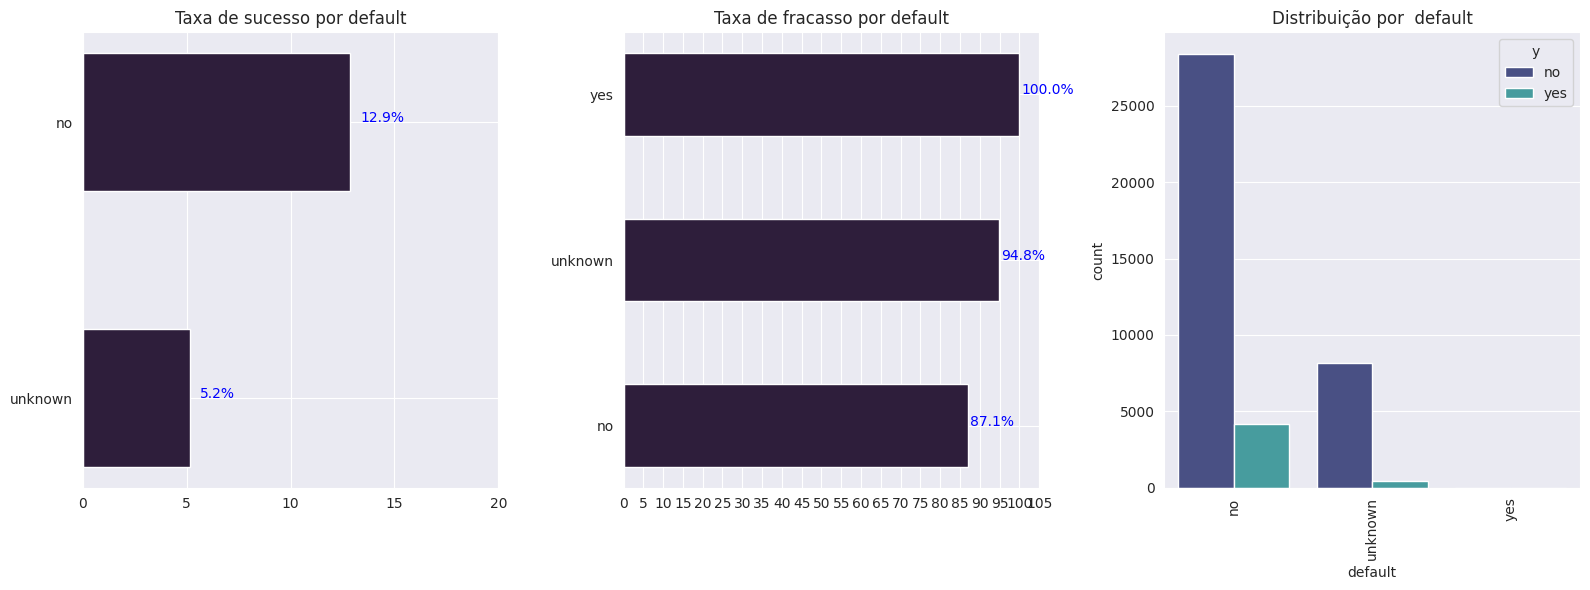

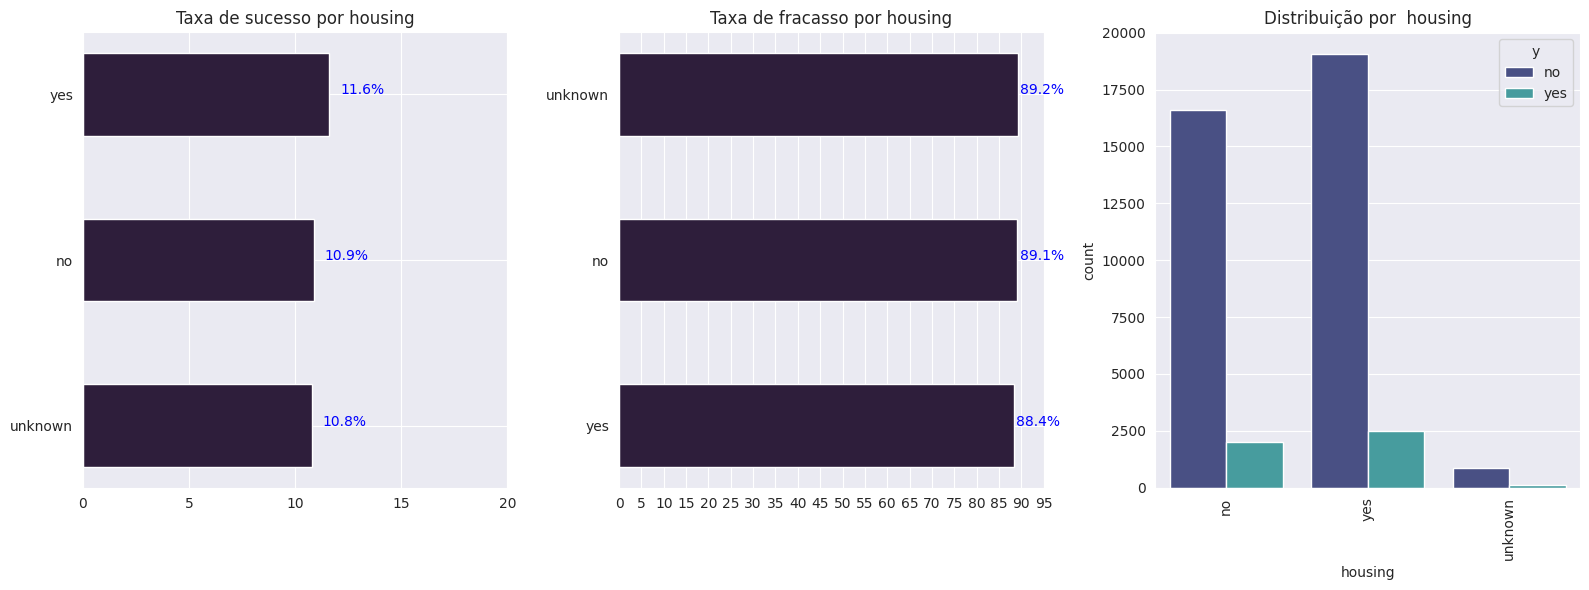

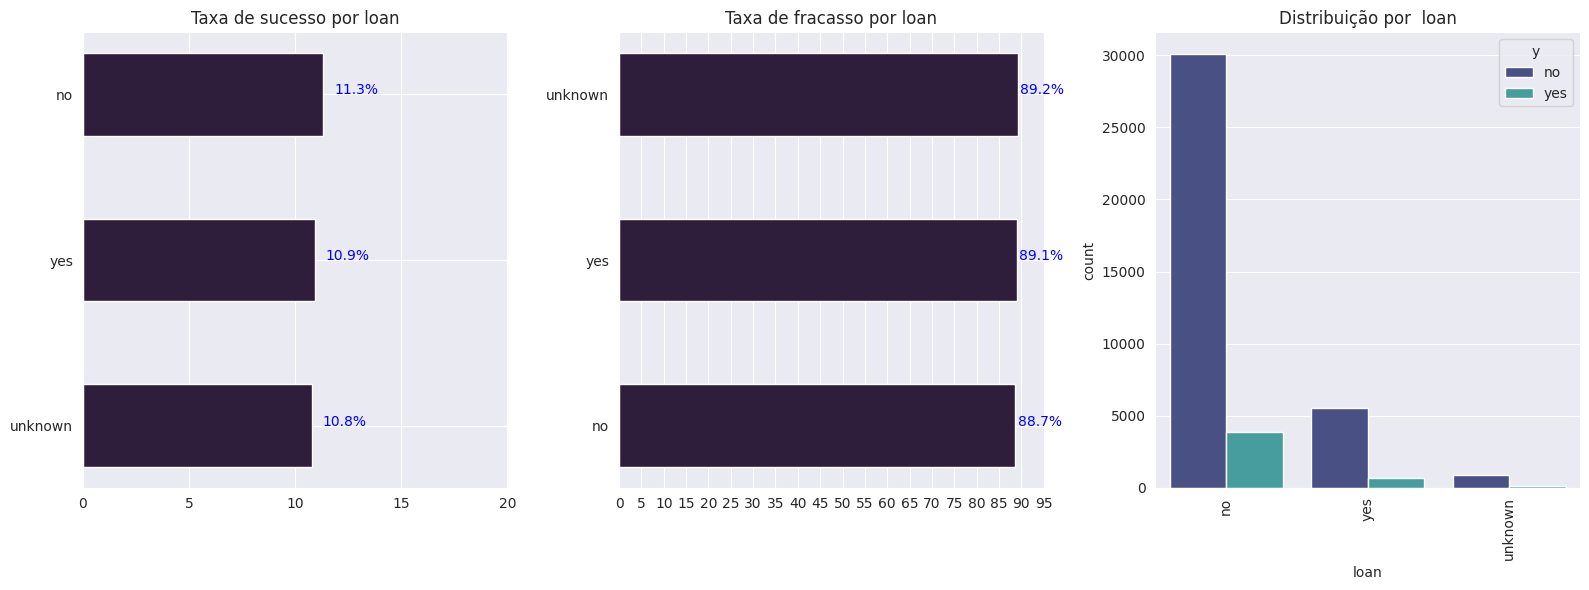

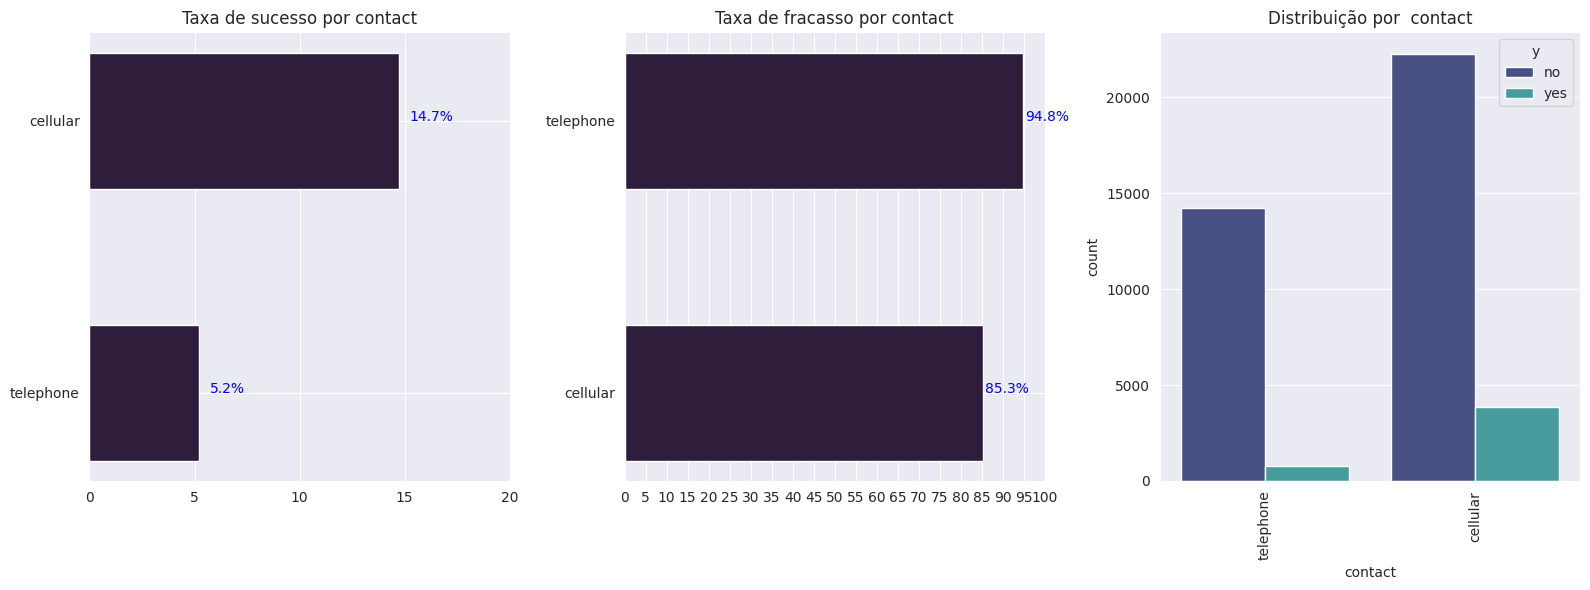

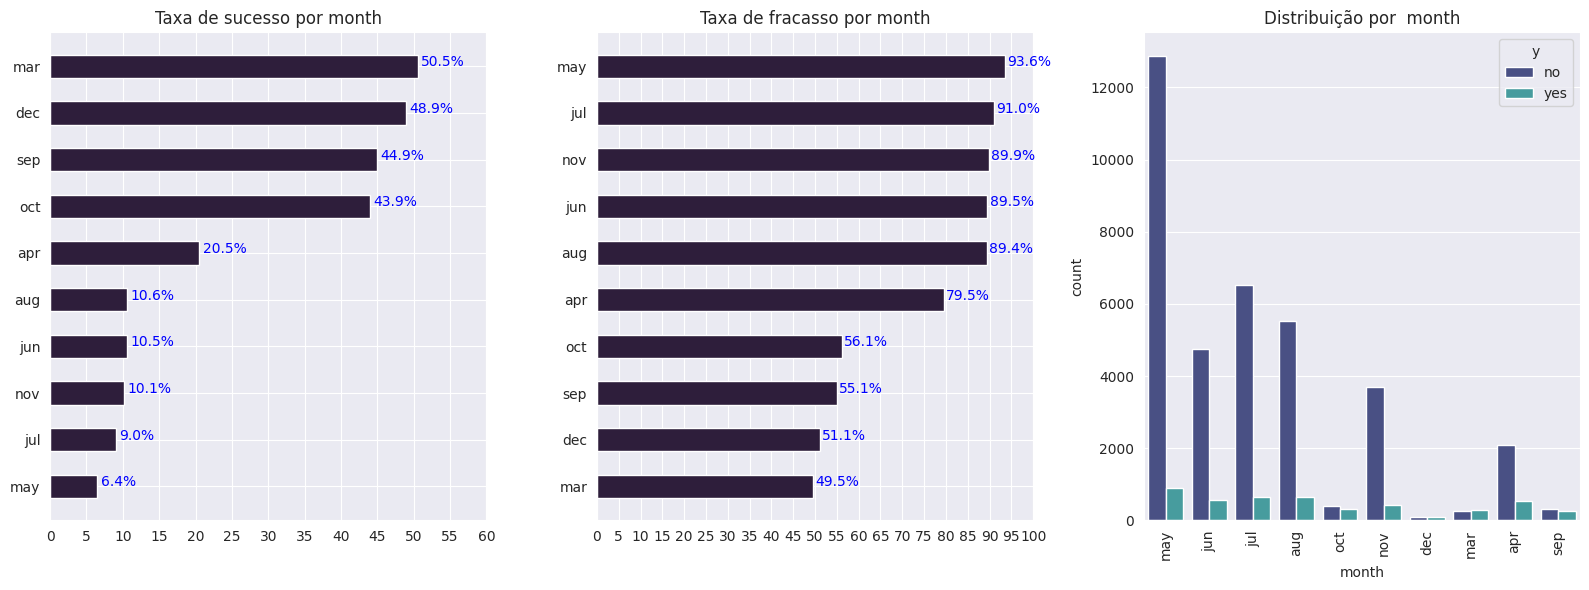

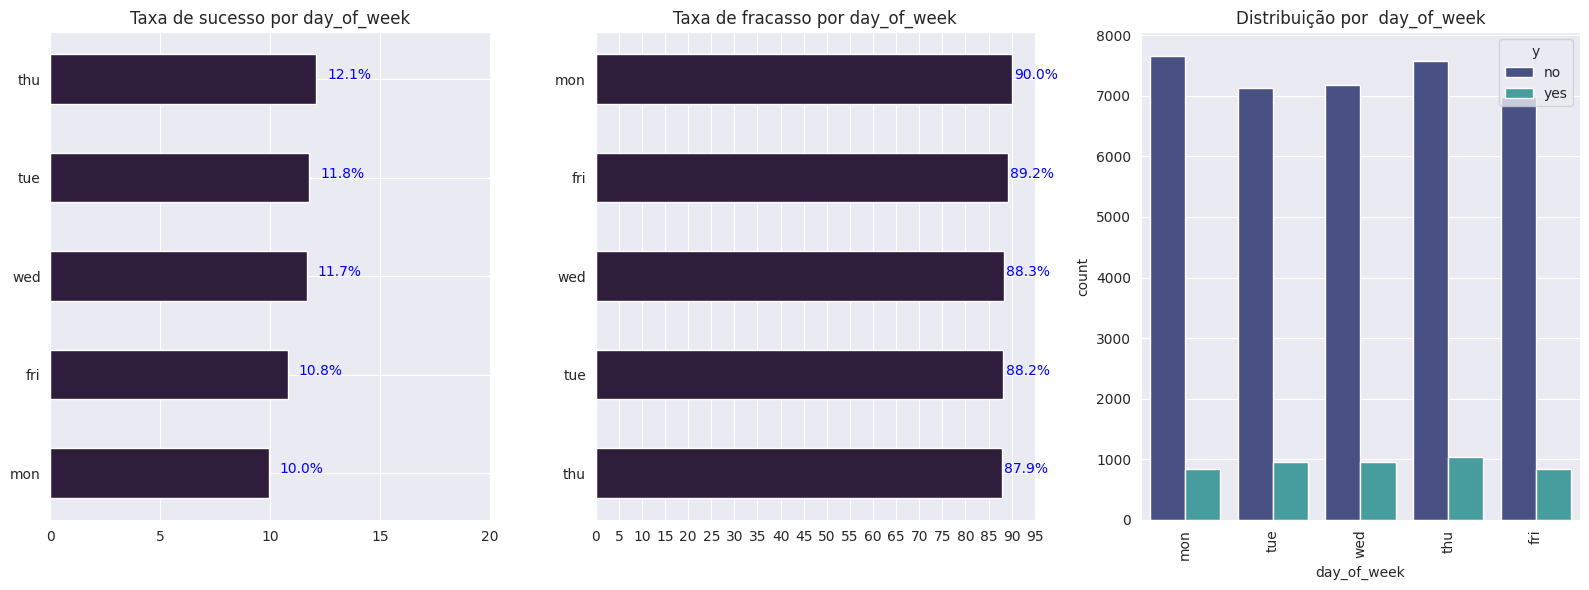

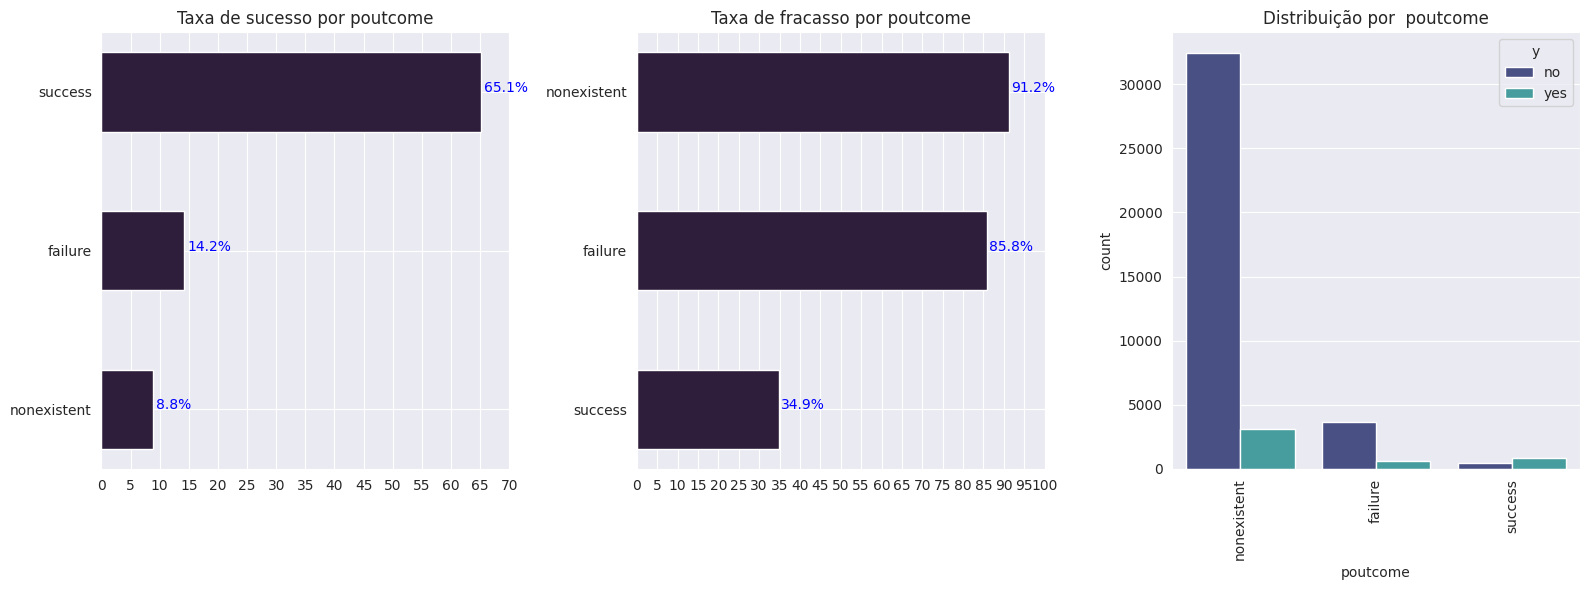

In [103]:
for column in coluna_categorica:

    yes_perc = feature_perc(column, target='yes')
    no_perc = feature_perc(column, target='no')

    plt.figure(figsize=(16,6))

    plt.subplot(1,3,1)
    sns.countplot(data=data, x=column, palette='mako', hue='y')
    plt.title(f'Distribuição por  {column}')
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    plt.title(f'Taxa de sucesso por {column}')
    plot_barh(yes_perc.sort_values(),5,10)

    plt.subplot(1,3,3)
    plt.title(f'Taxa de fracasso por {column}')
    plot_barh(no_perc.sort_values(),5,10)

    plt.tight_layout()
    plt.show()
    print()

In [104]:
coluna_categorica

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

Um breve resumo do que encontramos para as variáveis categóricas:

- Job:
  - Blue-collar, admin e technician, serem as maiores concentrações no dataset, quem mais contratou percentualmente foram student e retired.

- Marital:
  - Married é a mais representada na base, porém single contrataram mais percentualmente.

- Education:
  - University.degree e high.school são mais representativos na base e unknown e university.degree são os que mais contrataram, excluímos o percentual de illiterate, já que é muito pequeno este grupo.

- Default:
  - Quem não possui atraso em empréstimo (no) é o mais representativo e que mais contratou.

- Housing:
  - Quem possui já um empréstimo de habitação é a maior parte e contrataram mais.

- Loan:
  - Quem não possui empréstimo pessoal é a maior parte e contratou mais.

- Contact:
  - Contato por celular foi o que mais representou sucesso e maior parte da base.

- Month:
  - Os maiores meses de contato foram maio e junho, apesar de Março e dezembro serem os que mais tiveram empréstimos percentualmente.

- Day_of_week:
  - A distribuição por dia da semana é bem parecida, mas percentualmente quinta, terça e quarta foram os dias que mais deram sucesso.


- Poutcome:
  - Resultado da campanha anterior, quem nunca tinha sido contactado foi mais representado na base, porém que contratou anteriormente deu maior percentual em contratar neste novo contato.

Matriz de correlação dos dados numéricos:

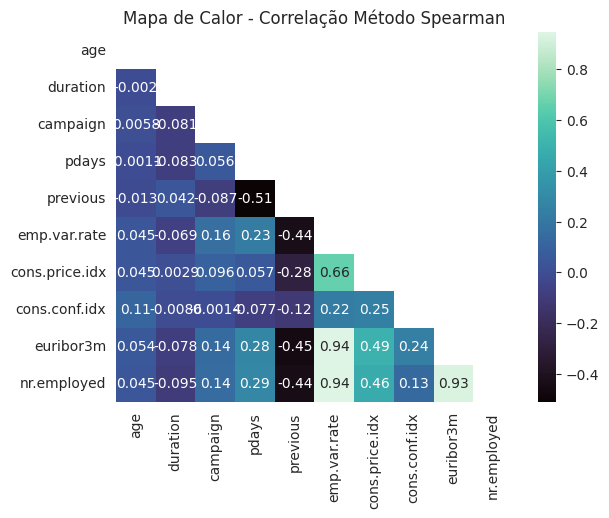

In [105]:
sns.set_style('white')

corr_df =  data.corr(method='spearman',numeric_only=True)
mask_ut=np.triu(np.ones(corr_df.shape)).astype(np.bool)


ax = sns.heatmap(corr_df,mask=mask_ut, annot=True, cmap='mako')
ax.set(title='Mapa de Calor - Correlação Método Spearman')
plt.show()

Dados que tem alta correlação neste ponto, podemos ver que as varoáveis euribor3m e emp.var.rate possuem uma alta correlação, logo podemos eliminar uma delas.

Além disto, temos alta correlação entre nr.employed e euribor3m, iremos eliminar uma delas.

### Tratamento

Iremos transformar nossa target em dado numérico para futuras aplicações em modelos.

In [106]:
data.y = pd.get_dummies(data['y'], columns = ['y'], prefix = ['y'], drop_first = True)

In [107]:
data.y.value_counts(normalize=True) * 100

0    88.733728
1    11.266272
Name: y, dtype: float64

Como visto lá no início, iremos remover a pdays devido ser informação que temos após a contratação e a euribor3m e nr.employed por ser altamente correlacionada com a 2 variáveis.

In [108]:
data.drop(columns= ['pdays', 'euribor3m', 'nr.employed'], inplace=True)

In [109]:
data.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,0


Os próximos tratamentos serão aplicados após a separação de treino e teste.
1. Para colunas categóricas irei utilizar o LabelEnconder
2. Podemos padronizar os dados para facilitar alguns modelos a serem treinados.


In [110]:
data.shape

(41176, 18)

In [111]:
data.iloc[:,0:18]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,0,nonexistent,-1.1,94.767,-50.8,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,0,nonexistent,-1.1,94.767,-50.8,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,0,nonexistent,-1.1,94.767,-50.8,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,0,nonexistent,-1.1,94.767,-50.8,1


In [112]:
%%time
test_size = 0.3
seed = 88977

# instanciando os encoders
label_encoder_y = LabelEncoder()

#instanciando o tratamento das colunas categóricas em texto
categorical_to_treat = coluna_categorica
one_hot_enc = make_column_transformer((OneHotEncoder(handle_unknown = 'error',drop='first'),
                                       categorical_to_treat),
                                      remainder='passthrough')

# Separação em conjuntos de treino e teste
X = data.iloc[:,0:18]
y = data.y

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação


# Adicionando tratamento no X_train para variáveis.

X_train_encoder = one_hot_enc.fit(X_train)
X_train = one_hot_enc.transform(X_train)
X_train = pd.DataFrame(X_train.todense(), columns=one_hot_enc.get_feature_names_out())
X_train.columns = [w.replace('onehotencoder__', '') for w in X_train.columns]
X_train.columns = [w.replace('remainder__', '') for w in X_train.columns]

# Retornando os dados de treino para formato de array
#X_train = X_train.values

CPU times: user 292 ms, sys: 1.89 ms, total: 294 ms
Wall time: 296 ms


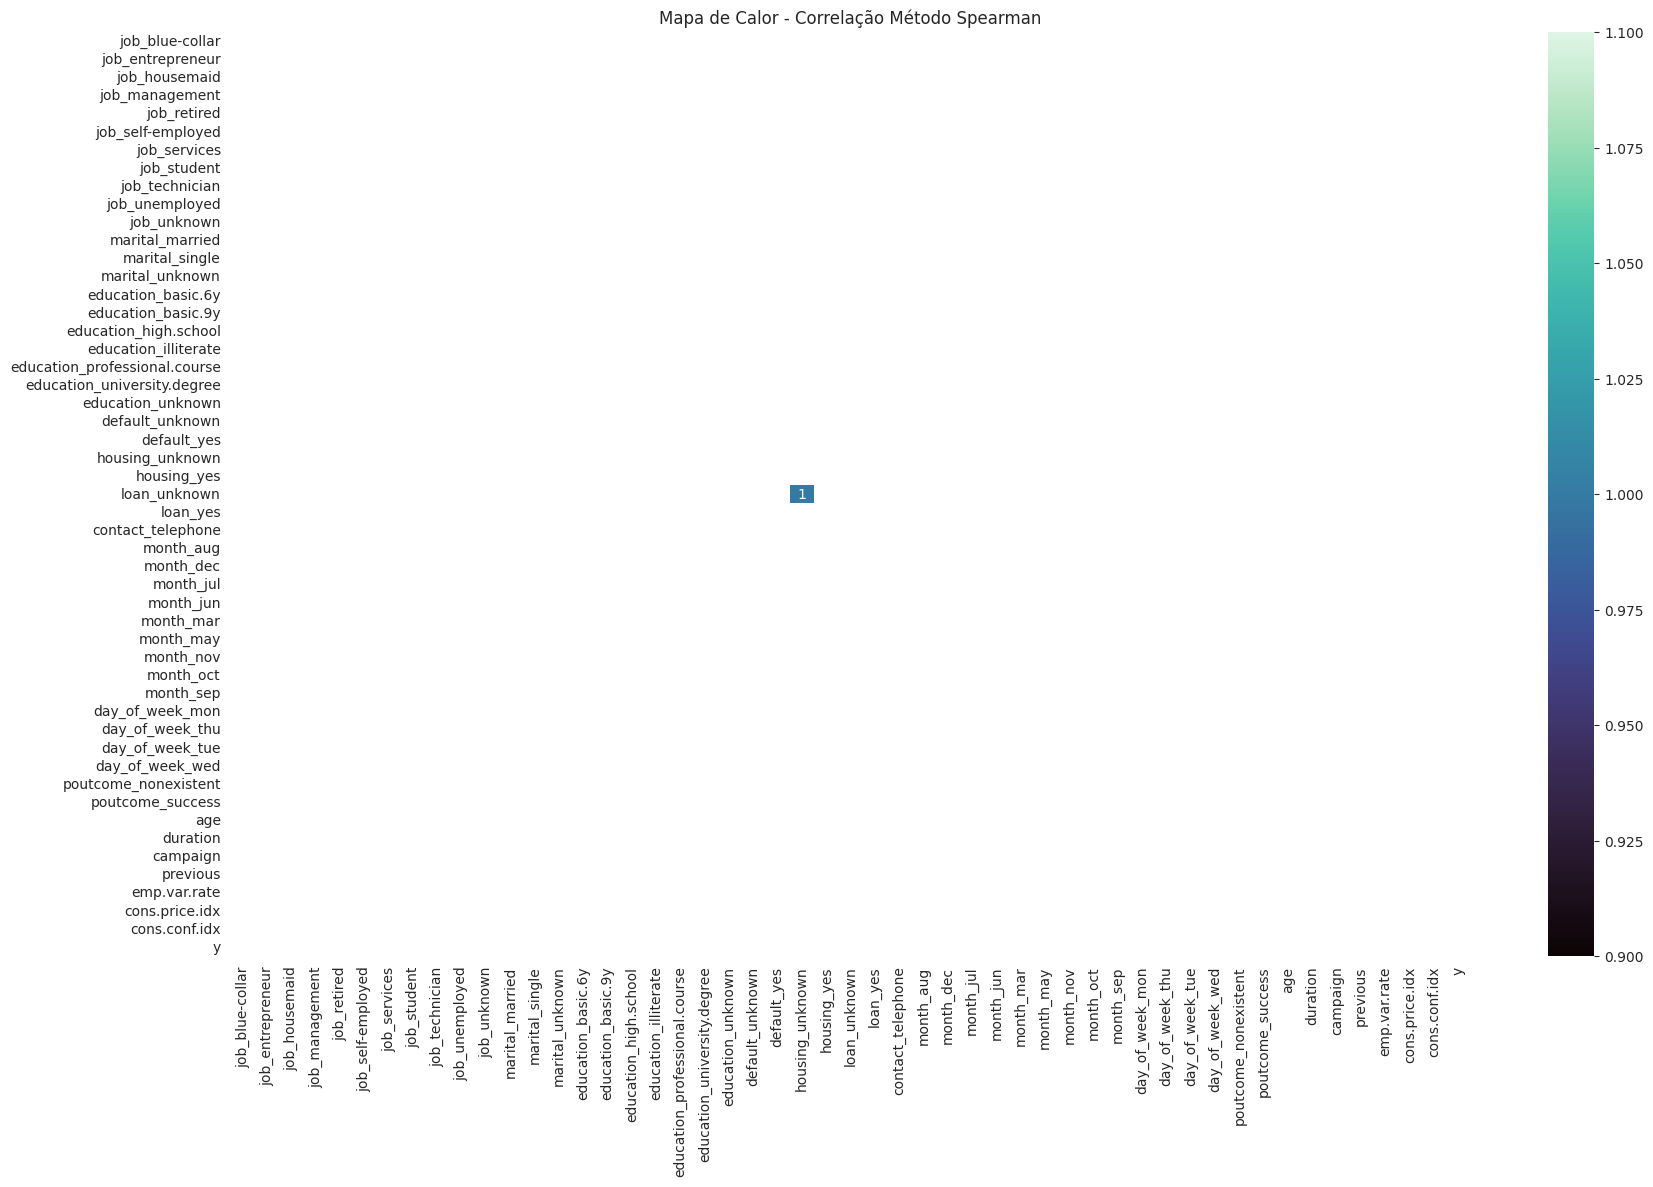

In [113]:
sns.set_style('white')

plt.figure(figsize=(20,12))


corr_df =  X_train.corr(method='spearman',numeric_only=True)
corr_df_grather_than_75 = corr_df[corr_df>=.75]
mask_ut=np.triu(np.ones(corr_df_grather_than_75.shape)).astype(np.bool)


ax = sns.heatmap(corr_df_grather_than_75,mask=mask_ut, annot=True, cmap='mako')
ax.set(title='Mapa de Calor - Correlação Método Spearman')
plt.show()

Podemos ver que após o tratamento, temos mais uma variável que deve ser elimidada, a housing_unknown ou loan_unknown devido a elas serem altamente correlacionadas.

#### Dataset final

In [114]:
X_train = X_train.drop(columns = ['housing_unknown'])